In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qingyi/wm811k-wafer-map")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1


In [3]:
with open('/root/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1/LSWMD.pkl', 'rb') as f:
    raw_data = pd.read_pickle(f)

print(raw_data)

                                                 waferMap  dieSize   lotName  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
...                                                   ...      ...       ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...    600.0  lot47542   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47543   

        waferIndex trianTestLabel    fa

In [7]:
raw_data.rename(columns={'trianTestLabel': 'trainTestLabel'}, inplace=True)
wafer_data = raw_data[raw_data['trainTestLabel'].str.len() != 0]

columns_to_drop = ['dieSize','lotName','waferIndex','trainTestLabel']

wafer_data = wafer_data.drop(columns = columns_to_drop)
wafer_data.reset_index(drop = True, inplace = True)
print(wafer_data)

                                                 waferMap    failureType
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       [[none]]
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       [[none]]
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       [[none]]
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       [[none]]
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       [[none]]
...                                                   ...            ...
172945  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...   [[Edge-Loc]]
172946  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...   [[Edge-Loc]]
172947  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  [[Edge-Ring]]
172948  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...   [[Edge-Loc]]
172949  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  [[Edge-Ring]]

[172950 rows x 2 columns]


In [8]:
defect_classes = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none']
num_classes = len(defect_classes)

<class 'numpy.ndarray'>


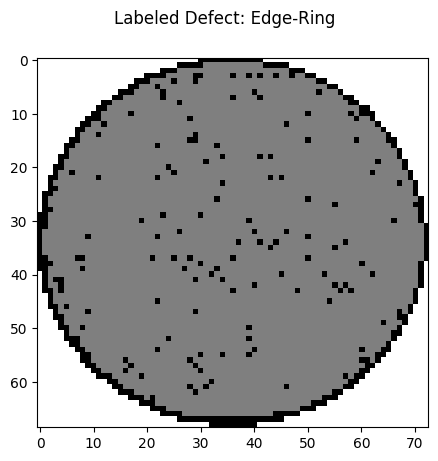

In [9]:
print(type(wafer_data.iloc[0]['waferMap']))
printWaferMap(wafer_data.iloc[10000])

In [10]:
# Print class distribution
describeWaferData(wafer_data, defect_classes)

Center: 4294
Donut: 555
Edge-Loc: 5189
Edge-Ring: 9680
Loc: 3593
Near-full: 149
Random: 866
Scratch: 1193
none: 147431


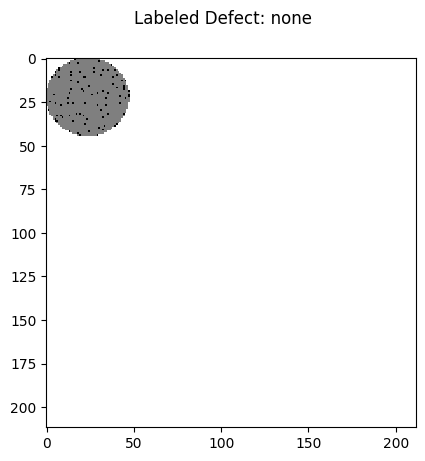

0


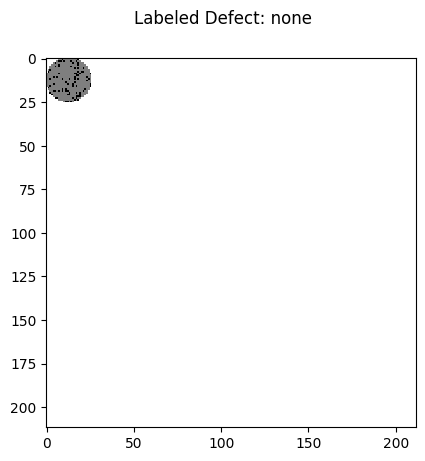

1000


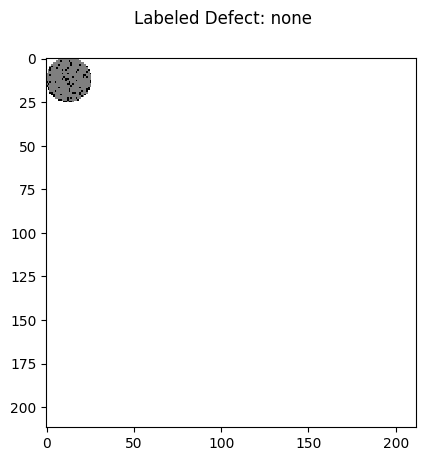

2000


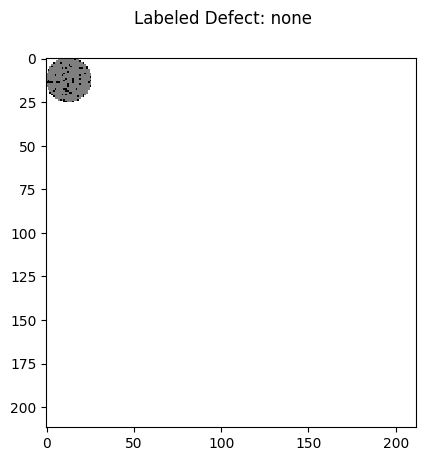

3000


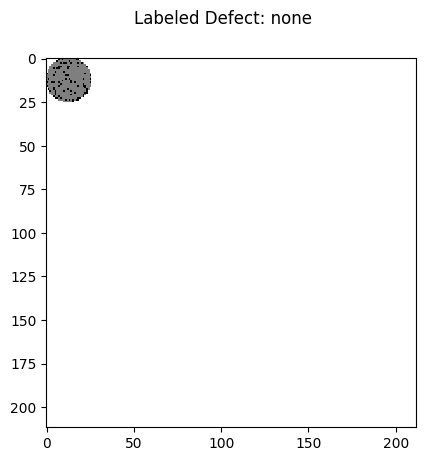

4000


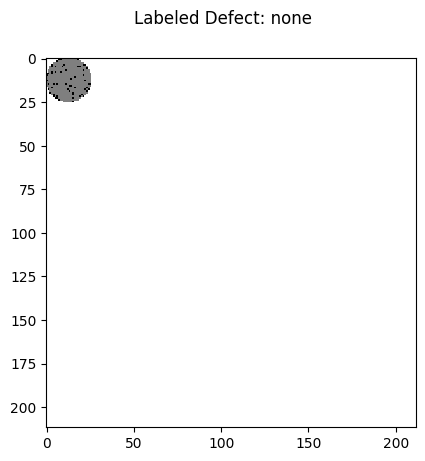

5000


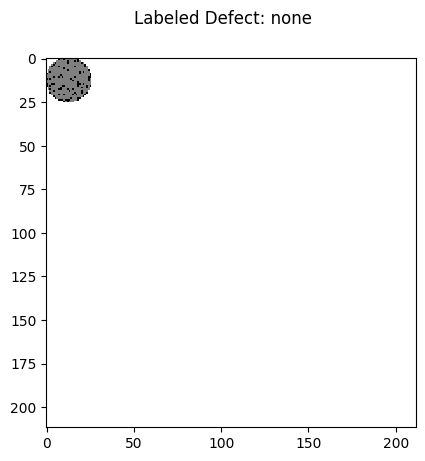

6000


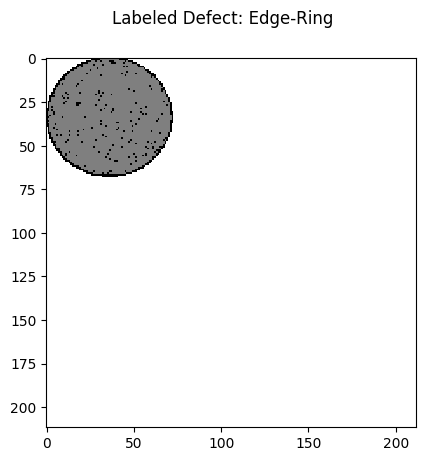

7000


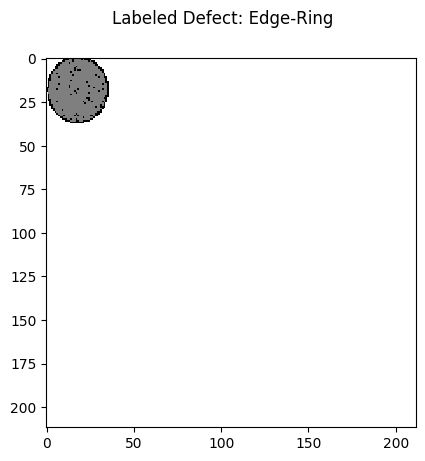

8000


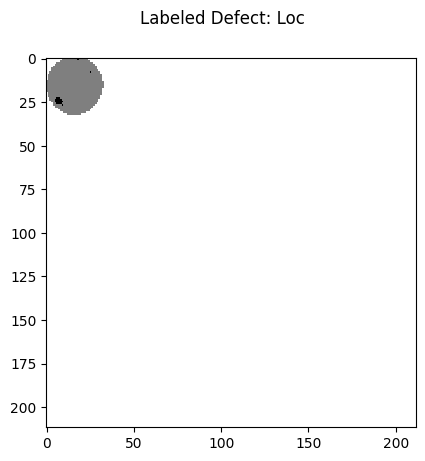

9000


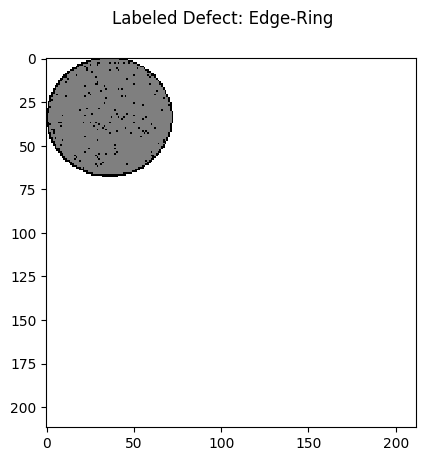

10000


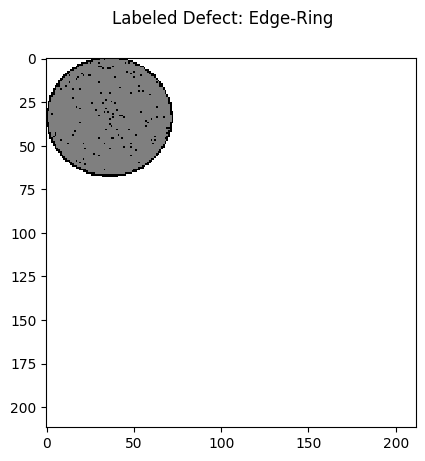

11000


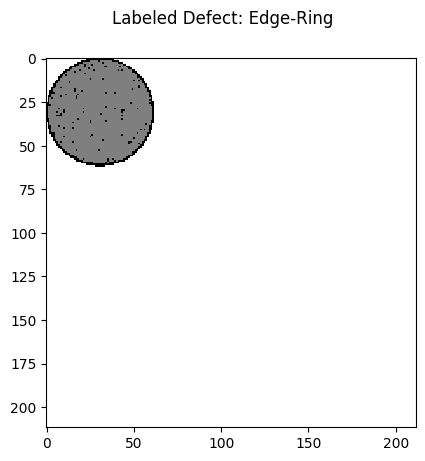

12000


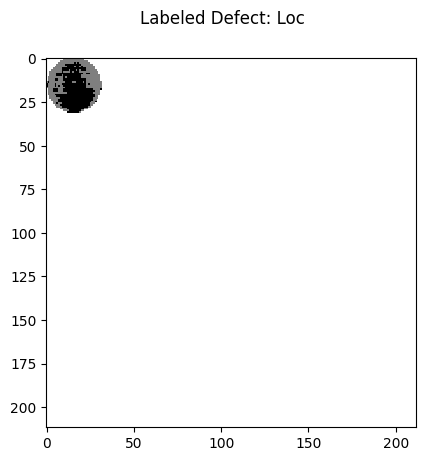

13000


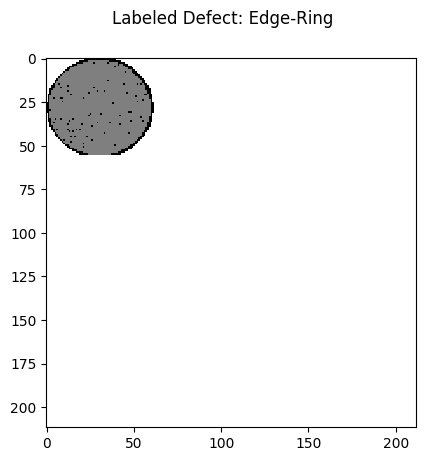

14000


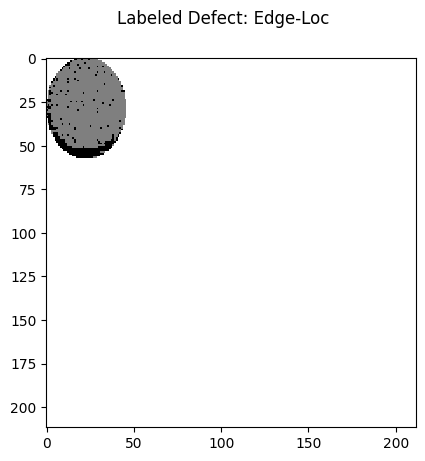

15000


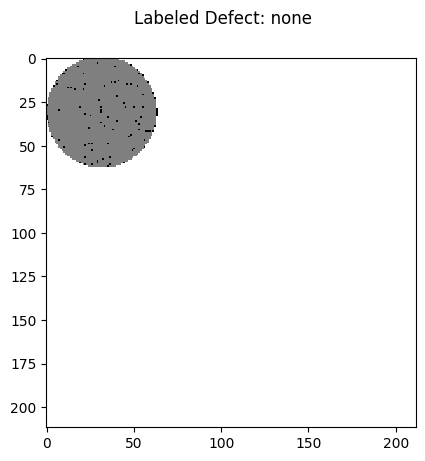

16000


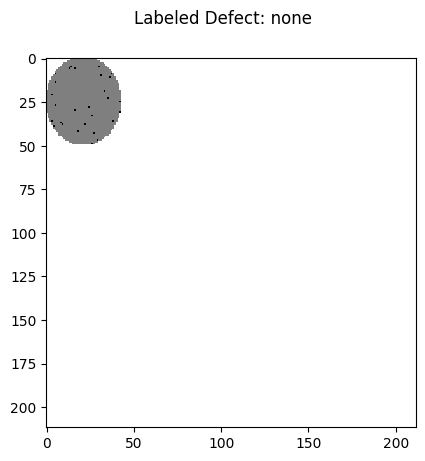

17000


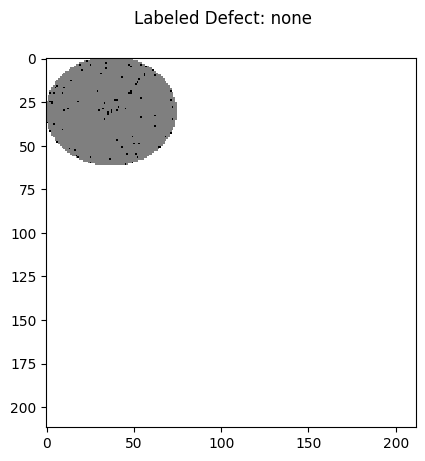

18000


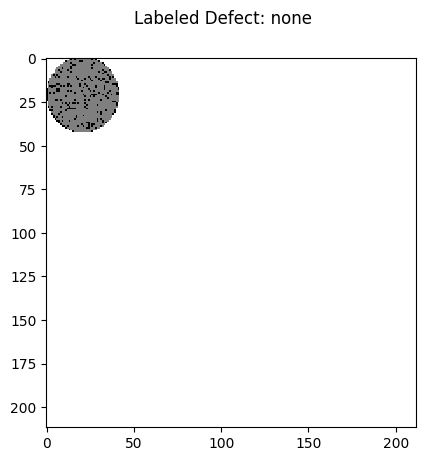

19000


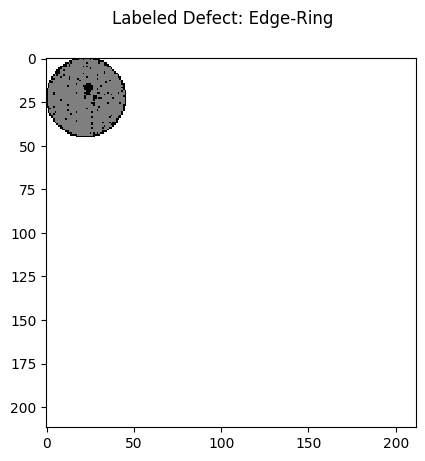

20000


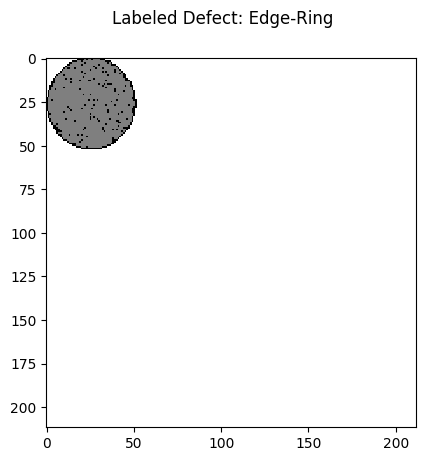

21000


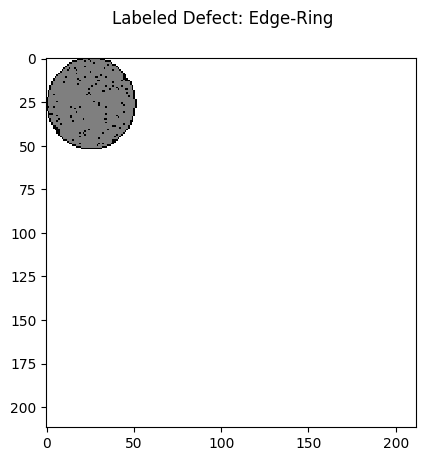

22000


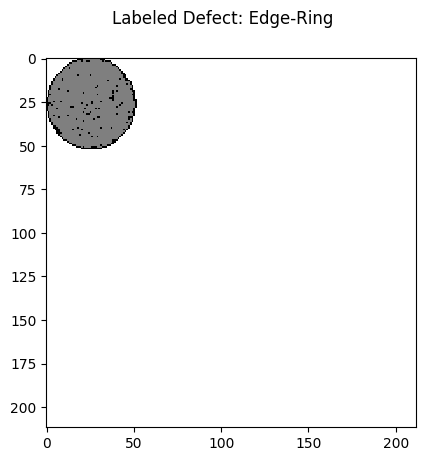

23000


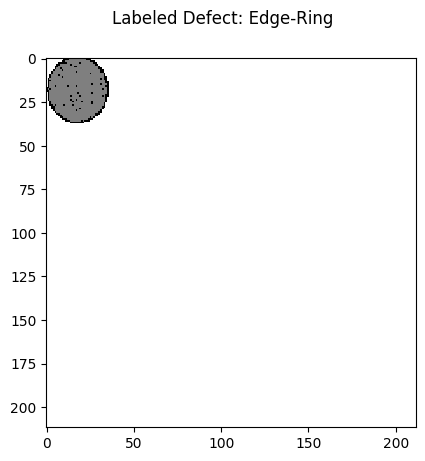

24000


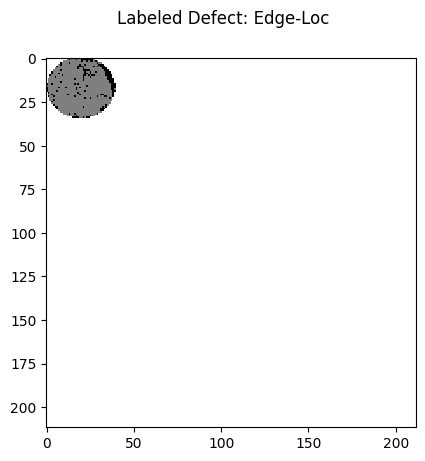

25000


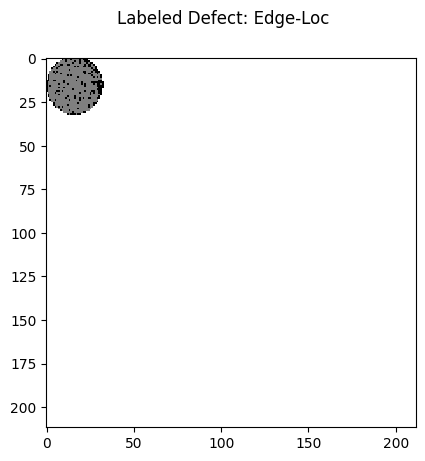

26000


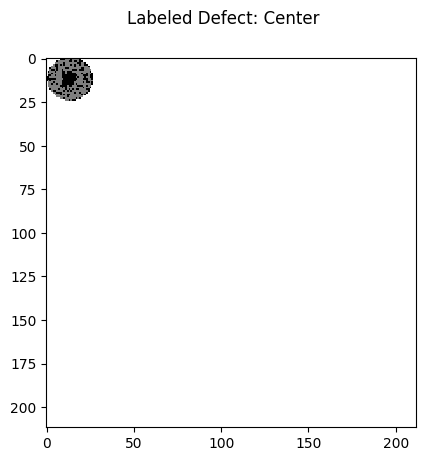

27000


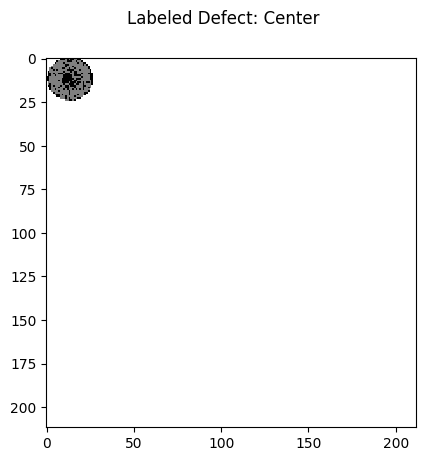

28000


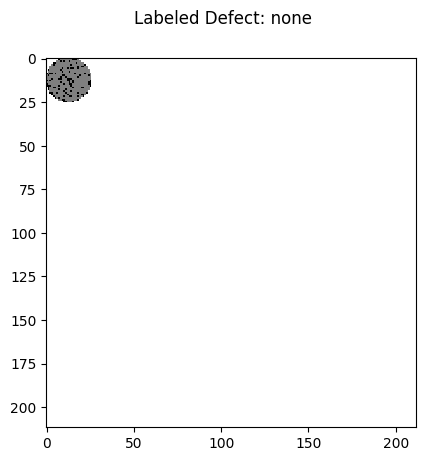

29000


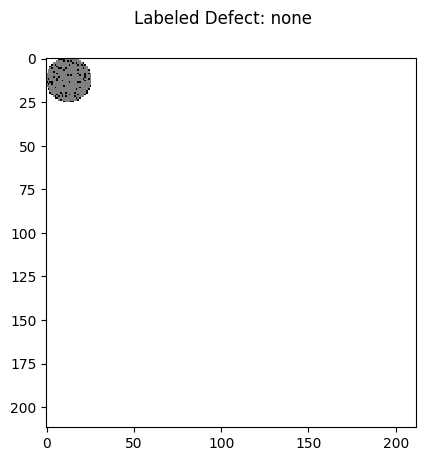

30000


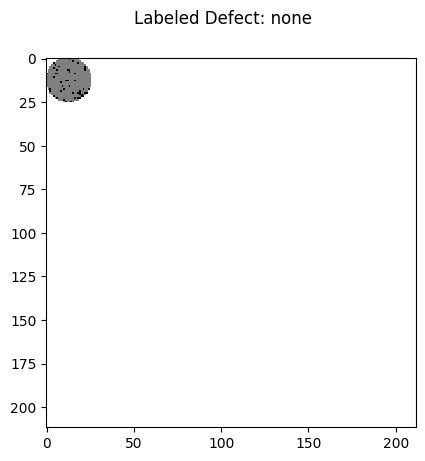

31000


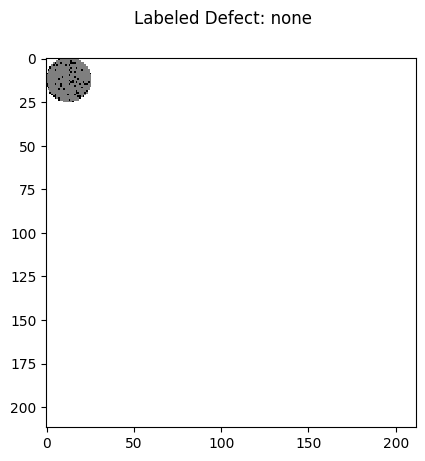

32000


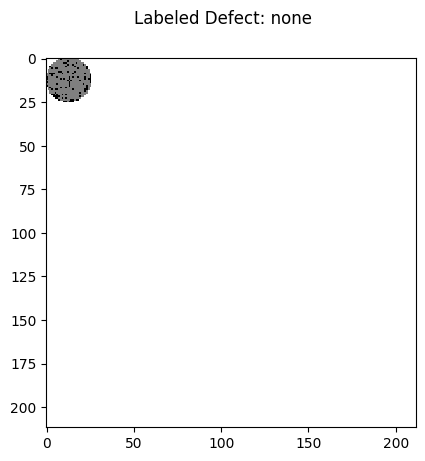

33000


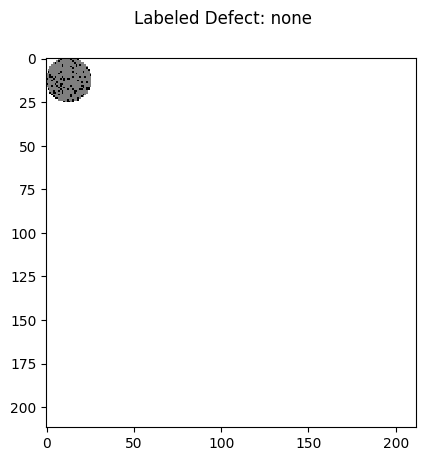

34000


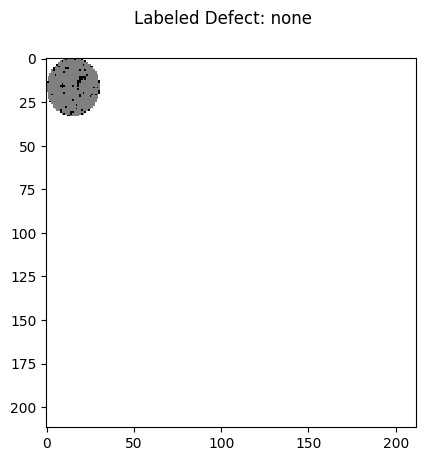

35000


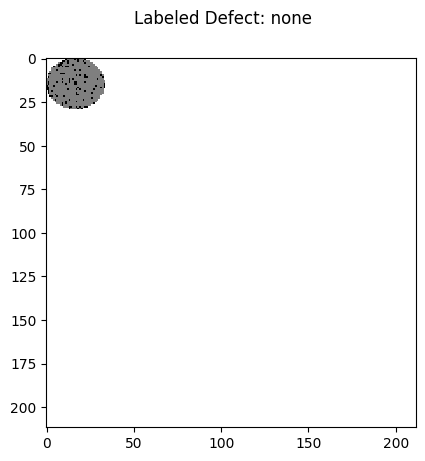

36000


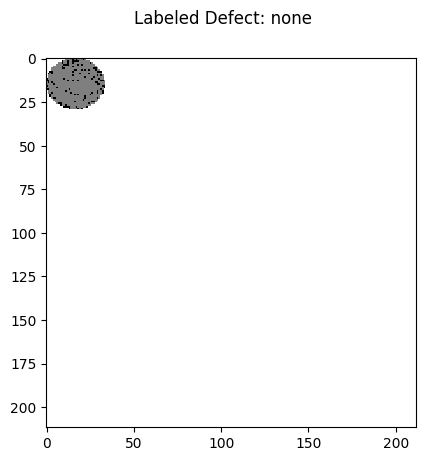

37000


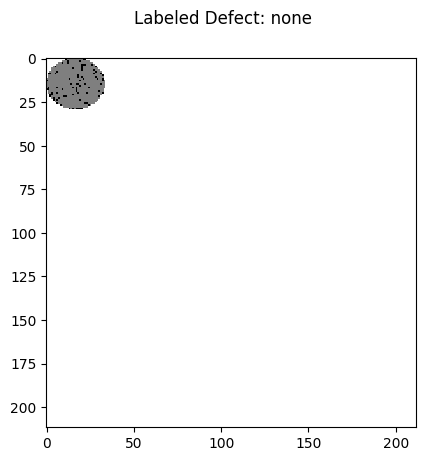

38000


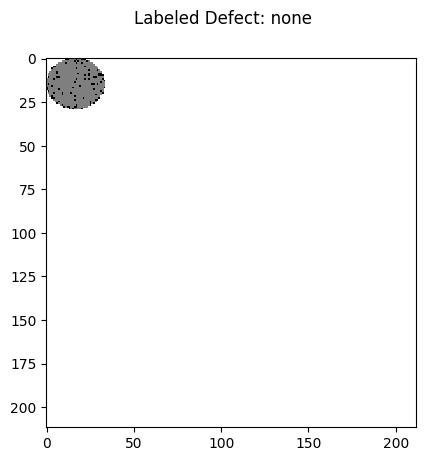

39000


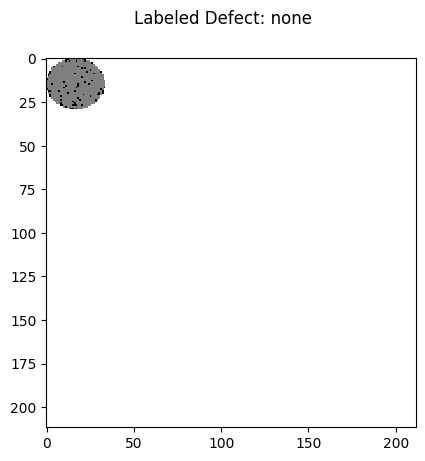

40000


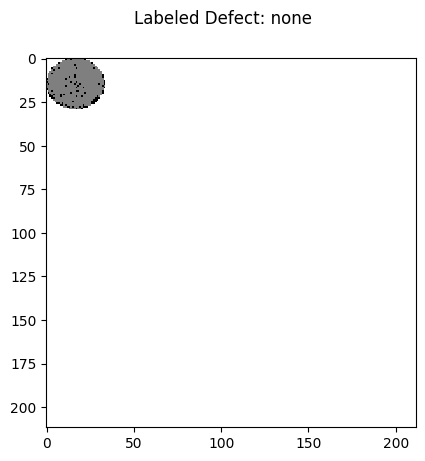

41000


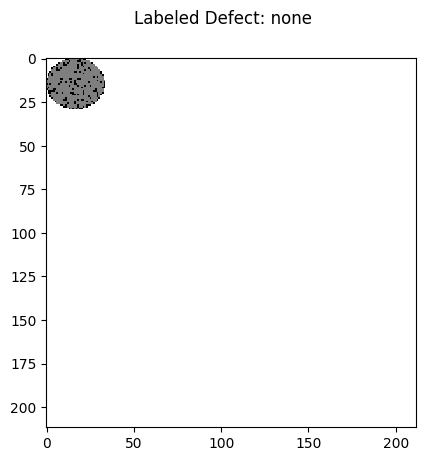

42000


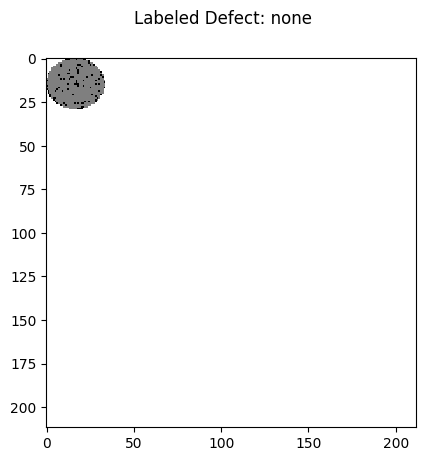

43000


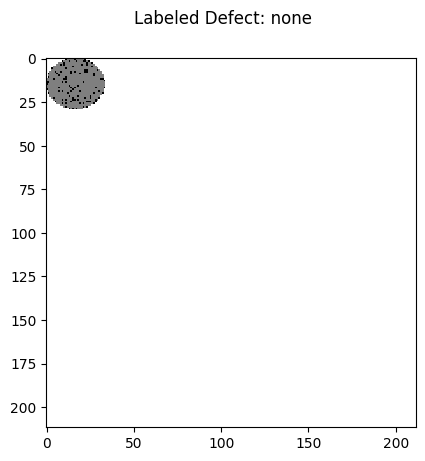

44000


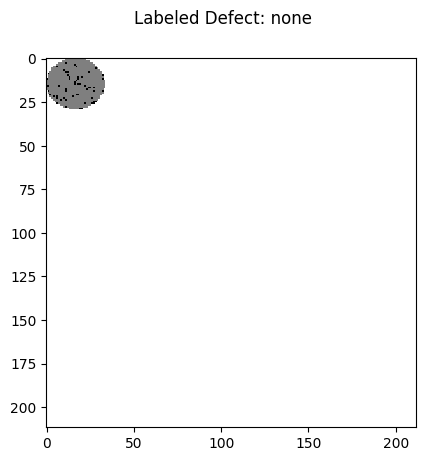

45000


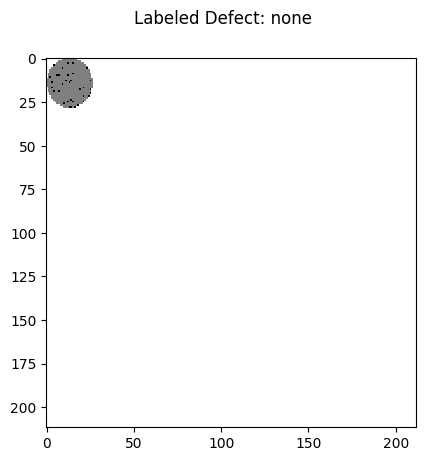

46000


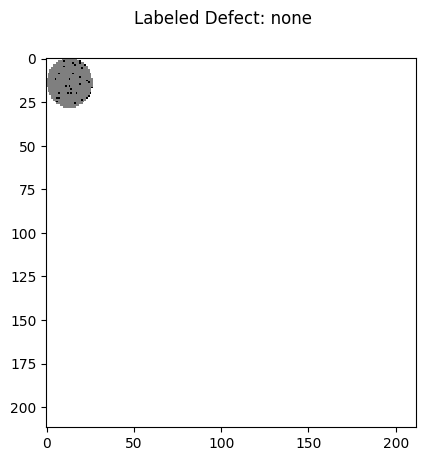

47000


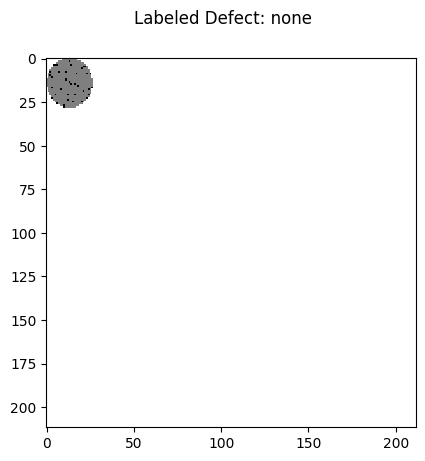

48000


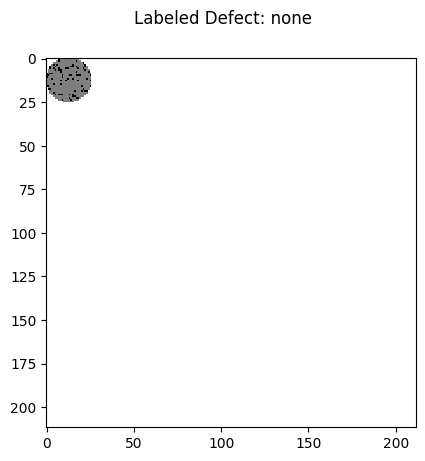

49000


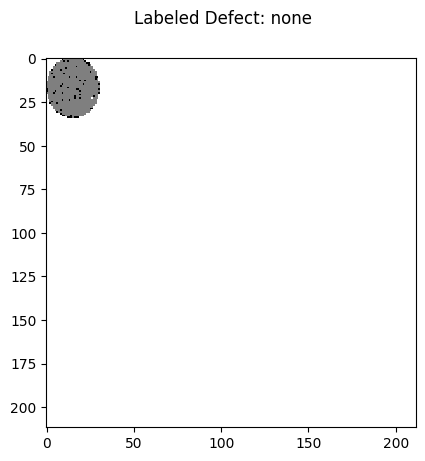

50000


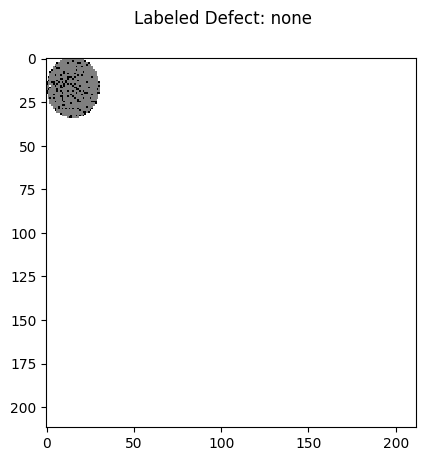

51000


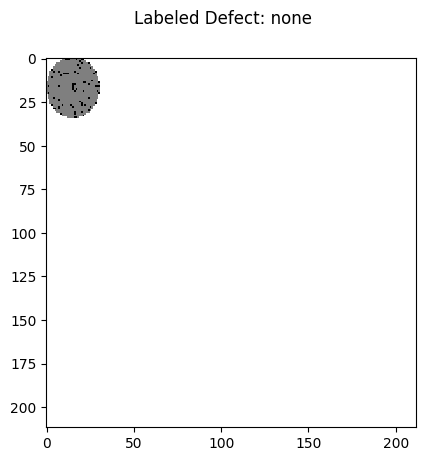

52000


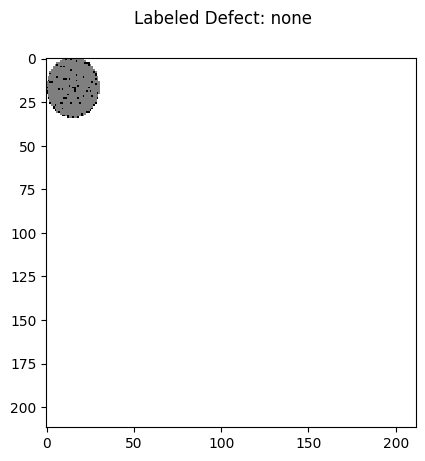

53000


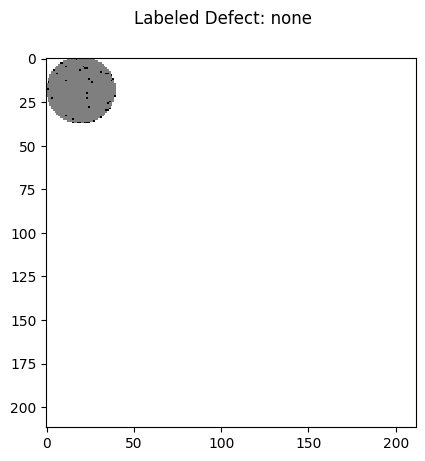

54000


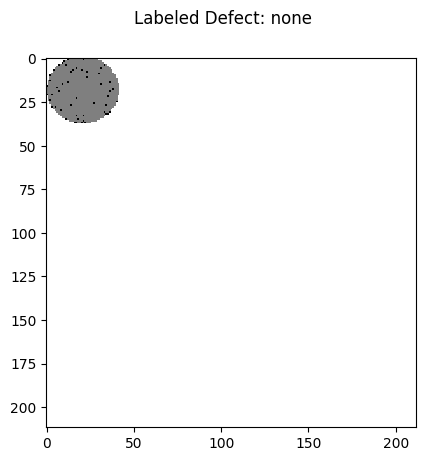

55000


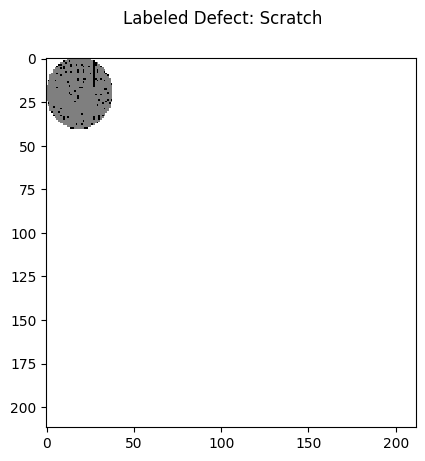

56000


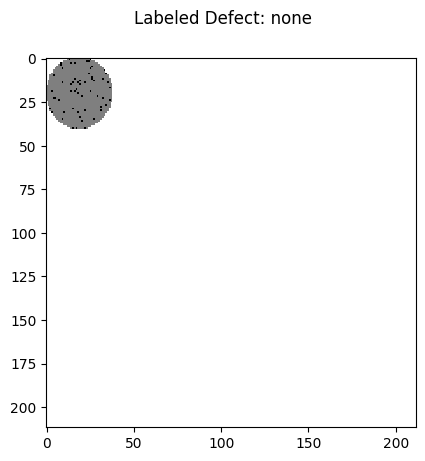

57000


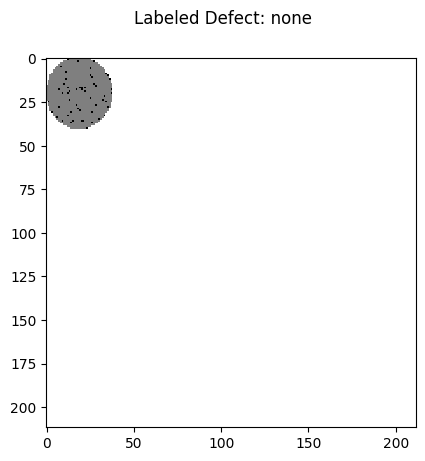

58000


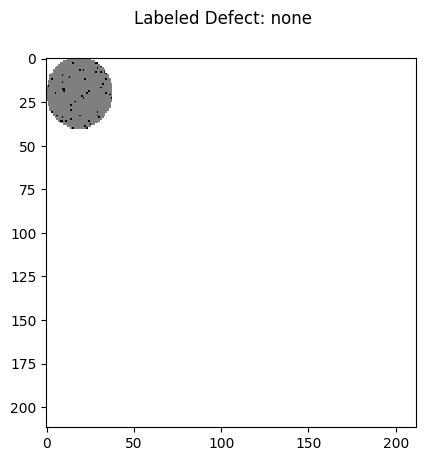

59000


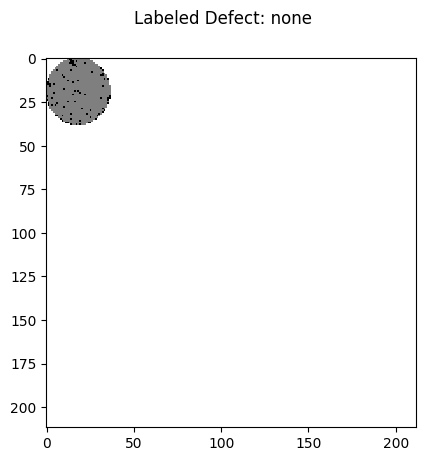

60000


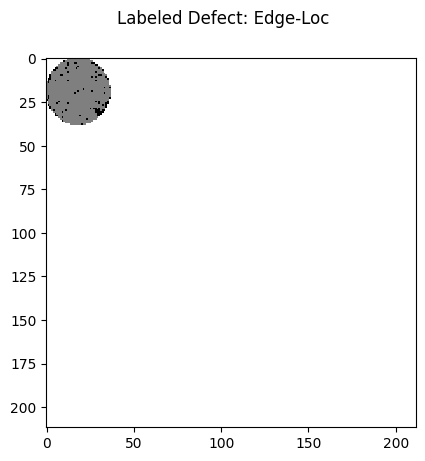

61000


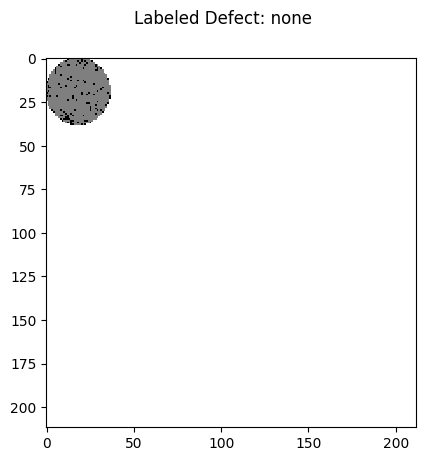

62000


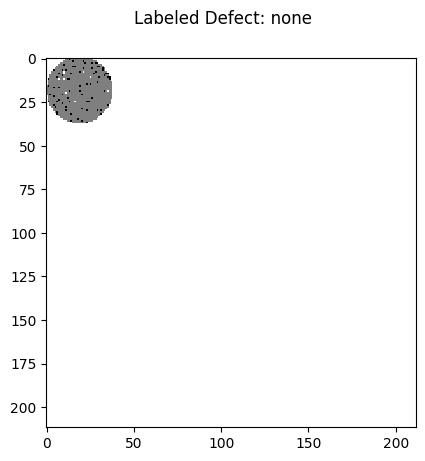

63000


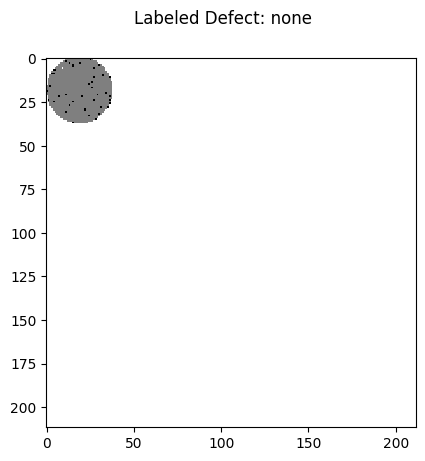

64000


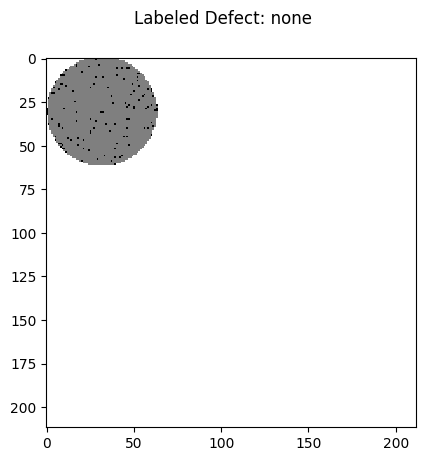

65000


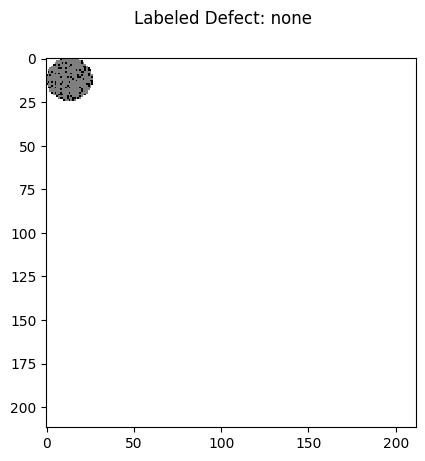

66000


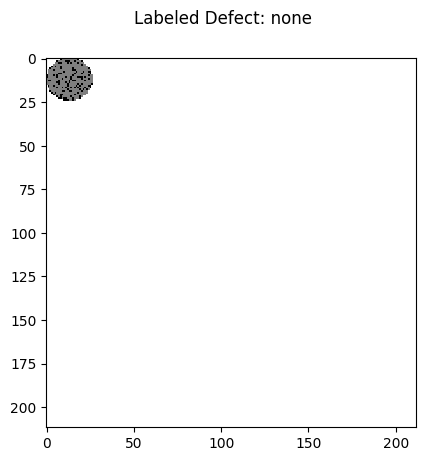

67000


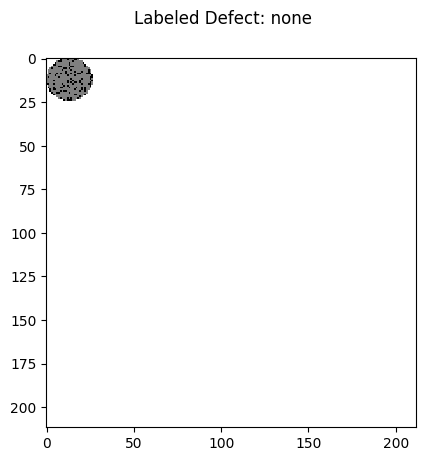

68000


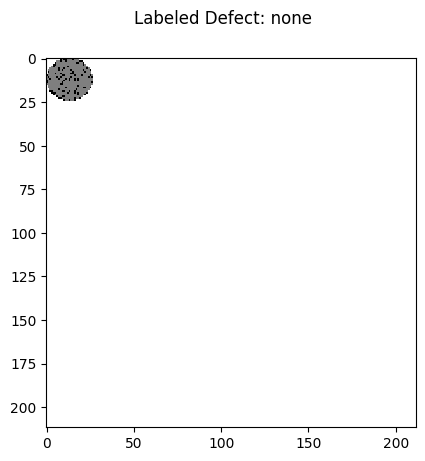

69000


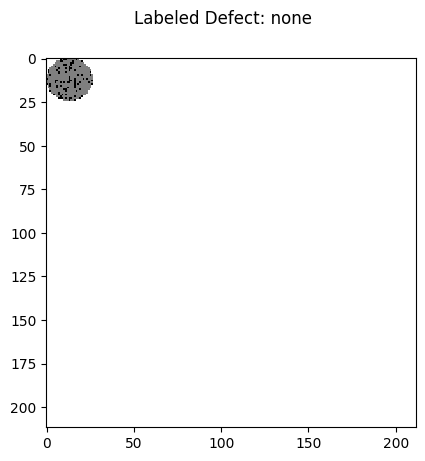

70000


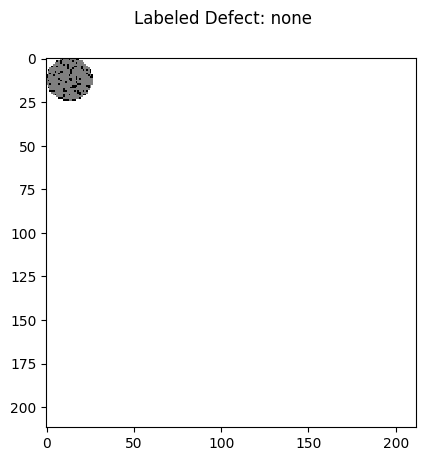

71000


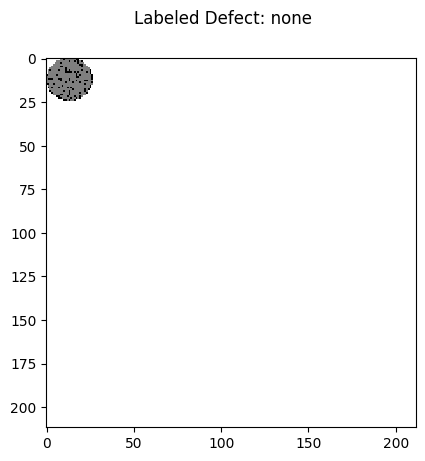

72000


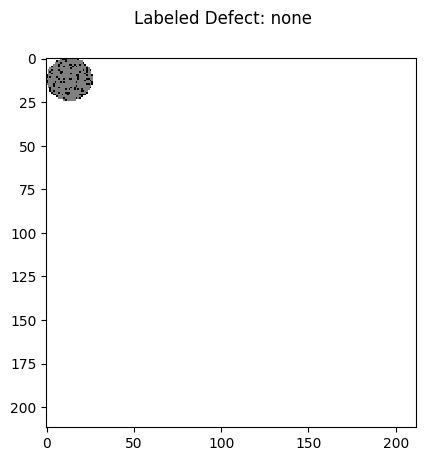

73000


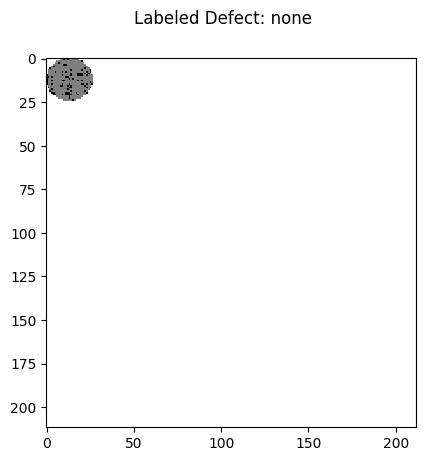

74000


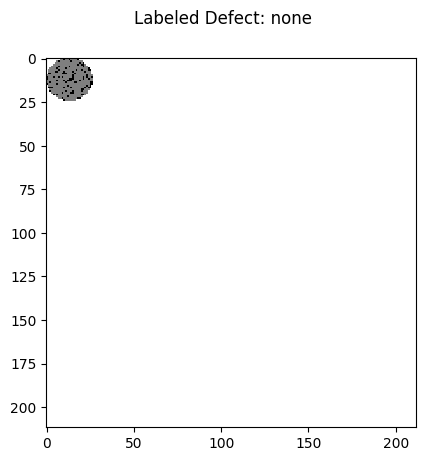

75000


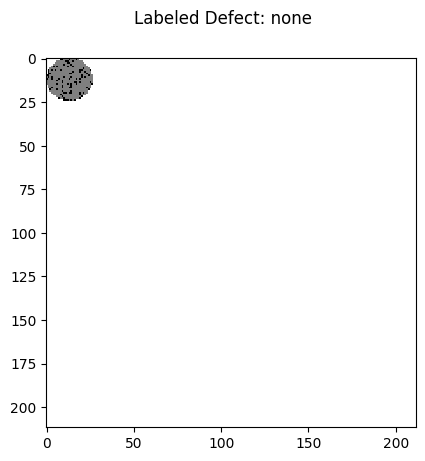

76000


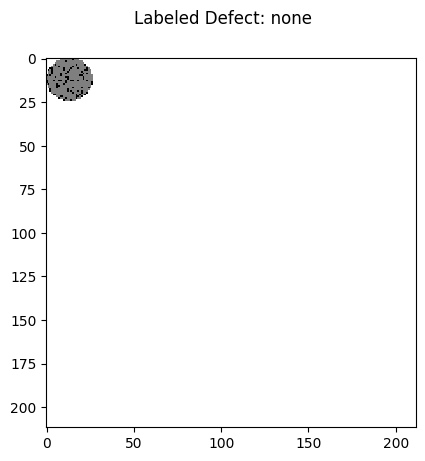

77000


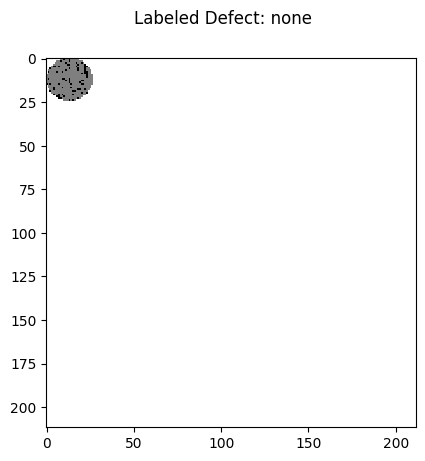

78000


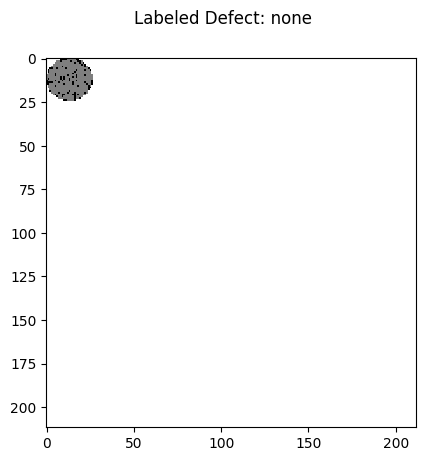

79000


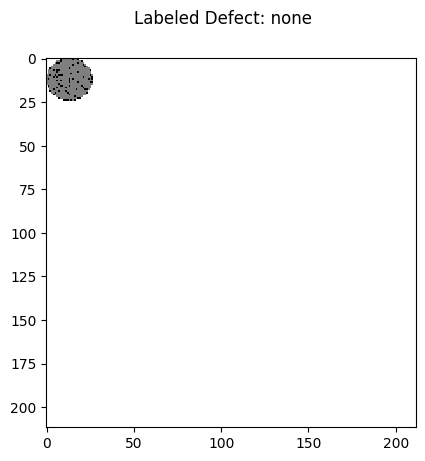

80000


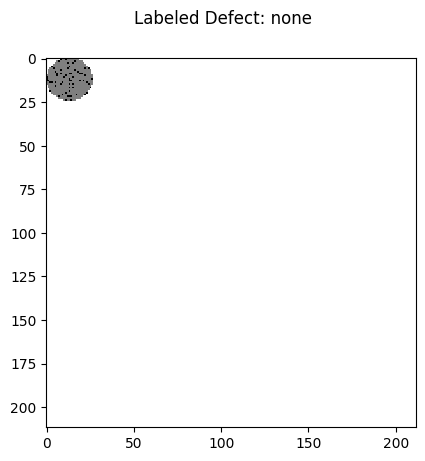

81000


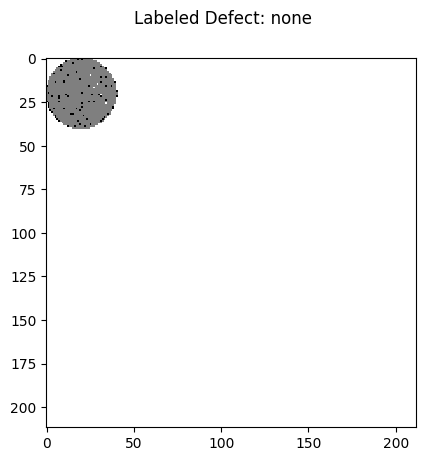

82000


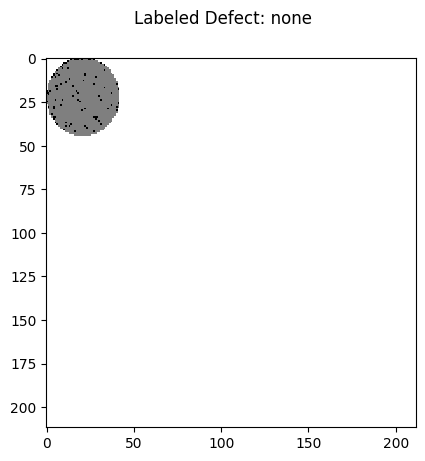

83000


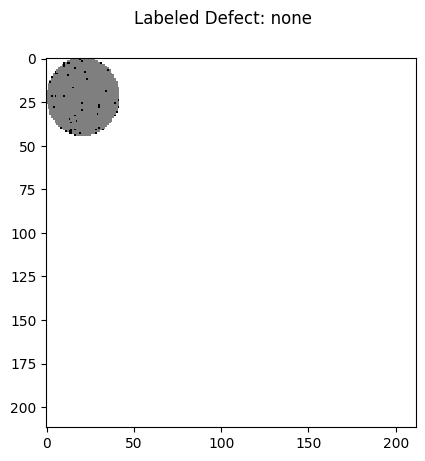

84000


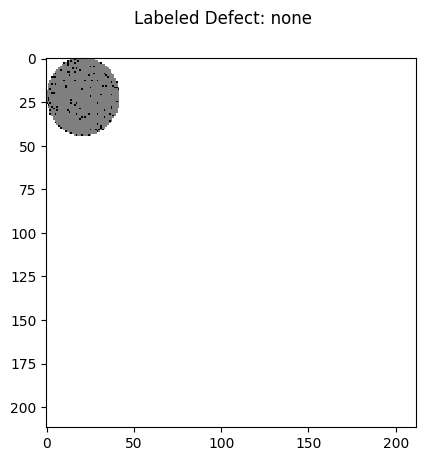

85000


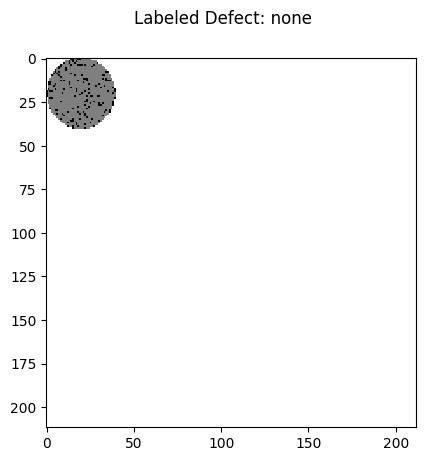

86000


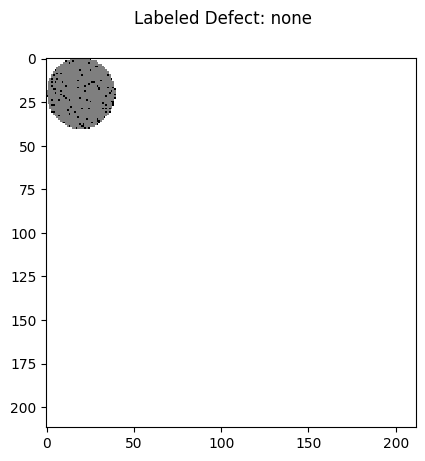

87000


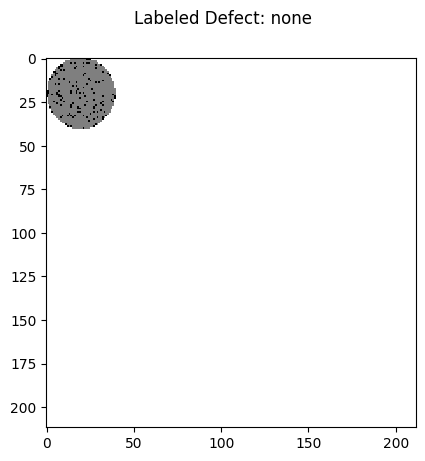

88000


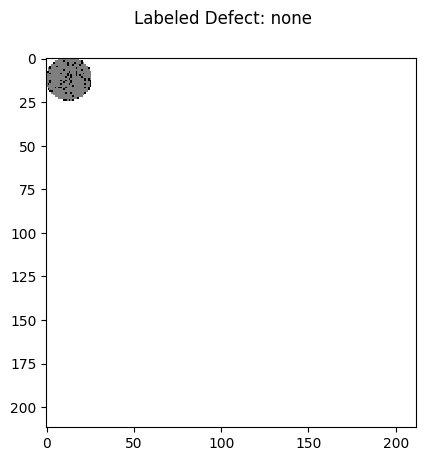

89000


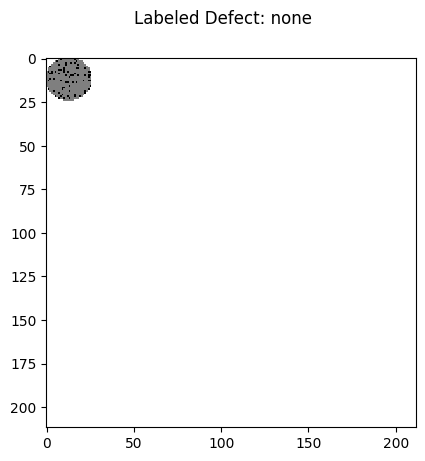

90000


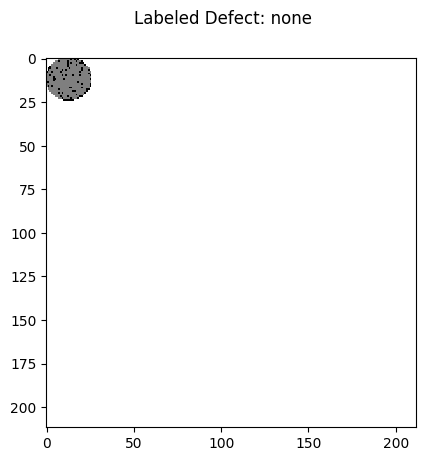

91000


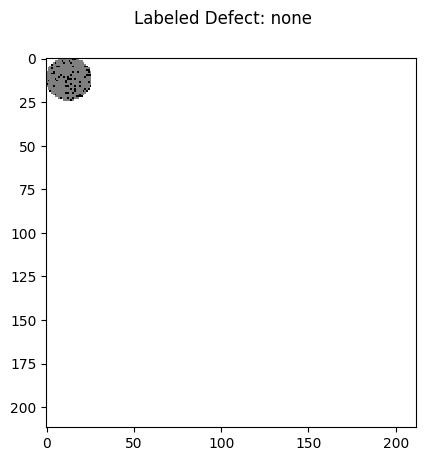

92000


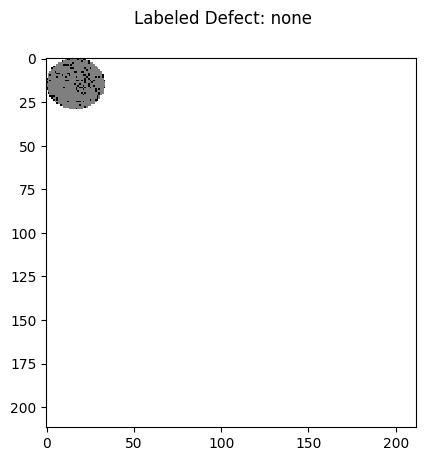

93000


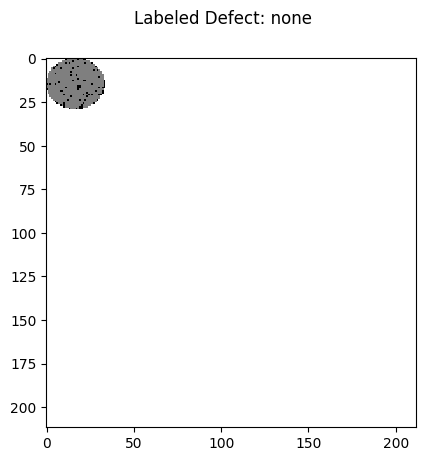

94000


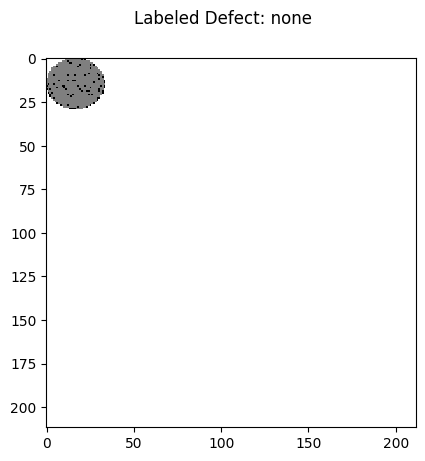

95000


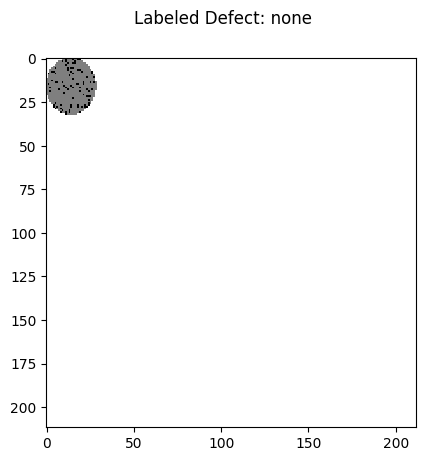

96000


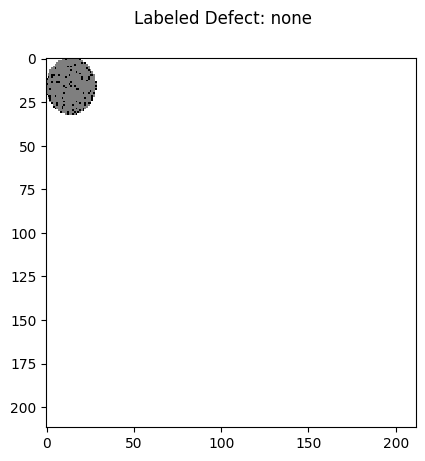

97000


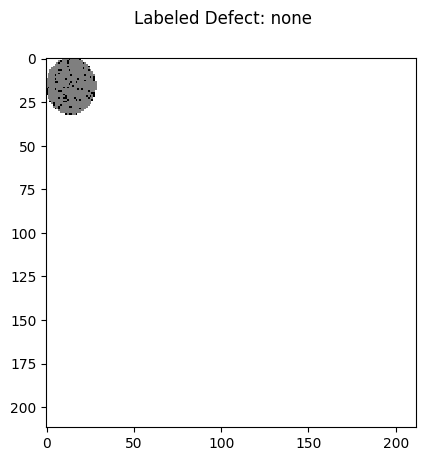

98000


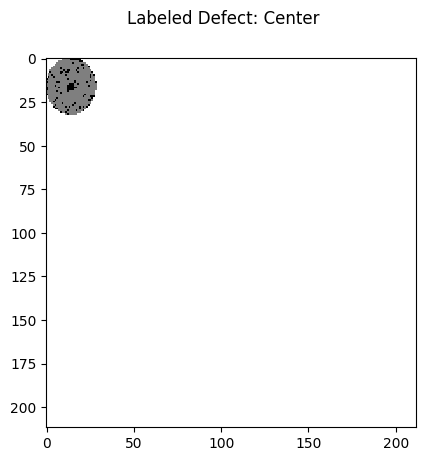

99000


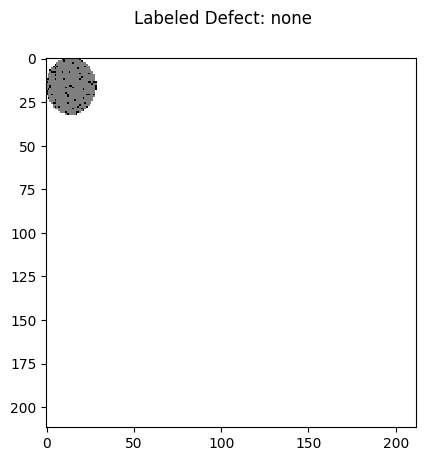

100000


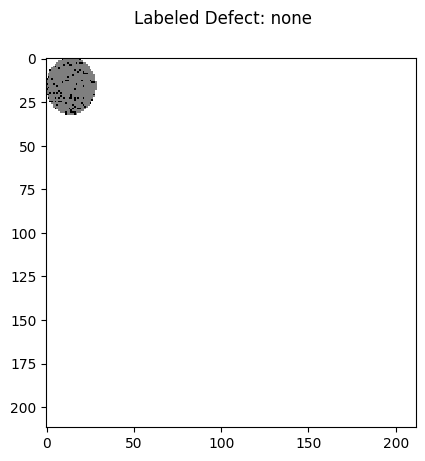

101000


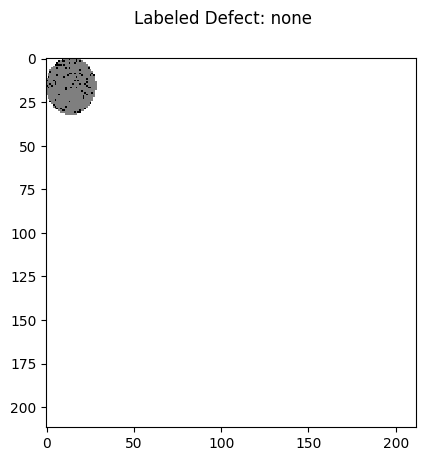

102000


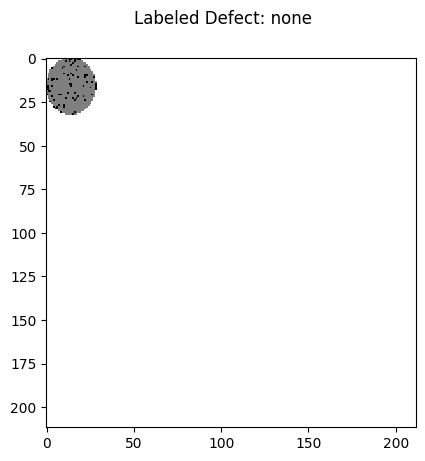

103000


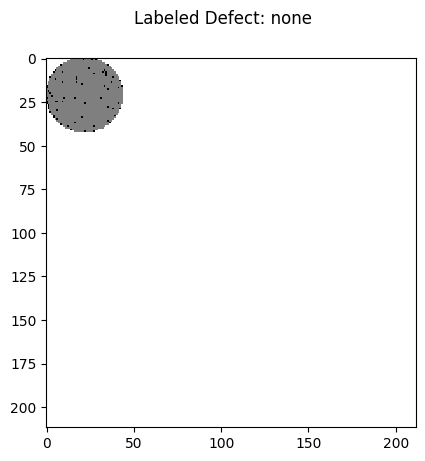

104000


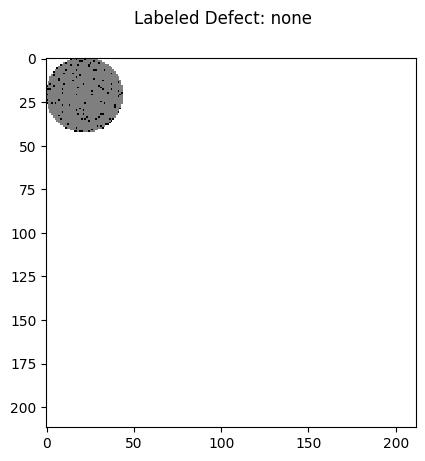

105000


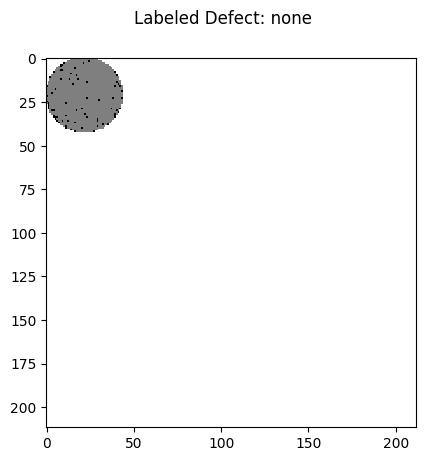

106000


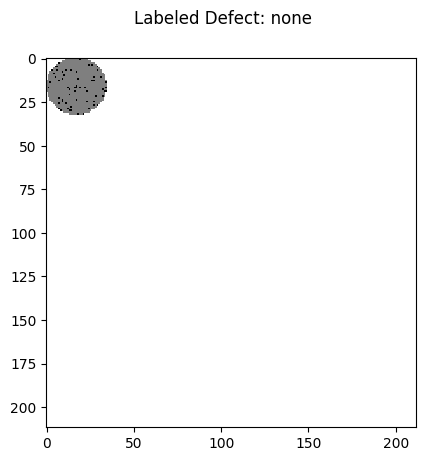

107000


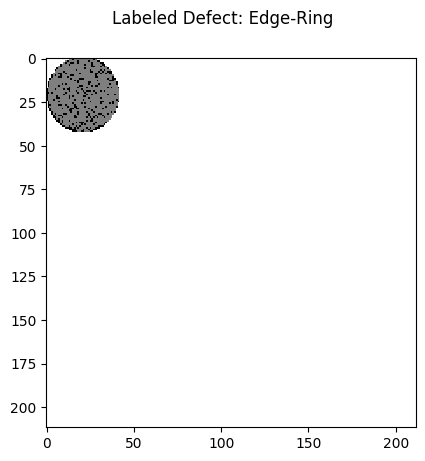

108000


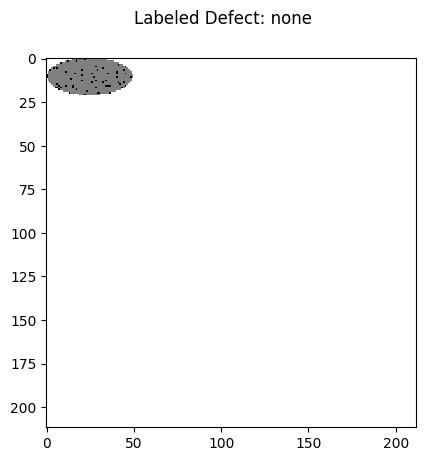

109000


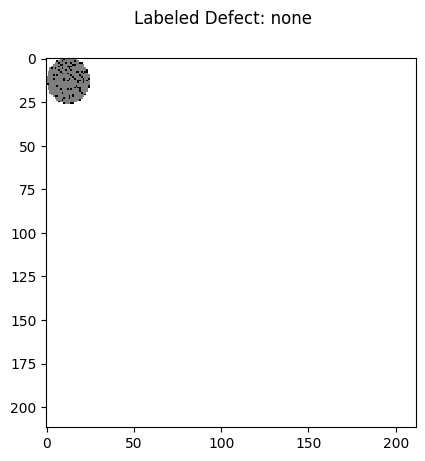

110000


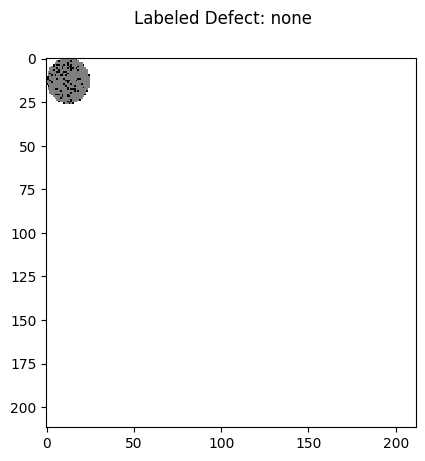

111000


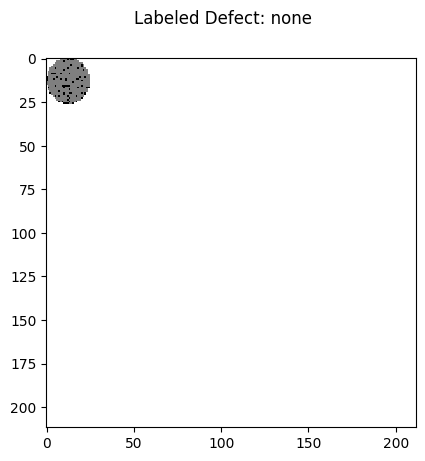

112000


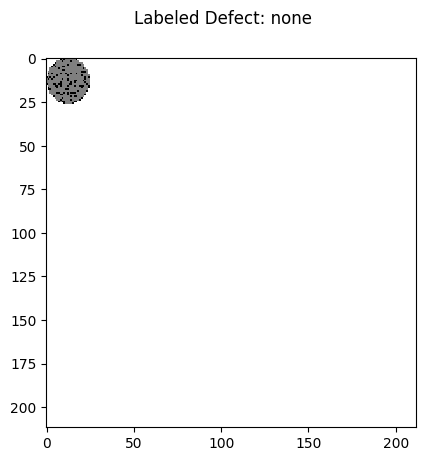

113000


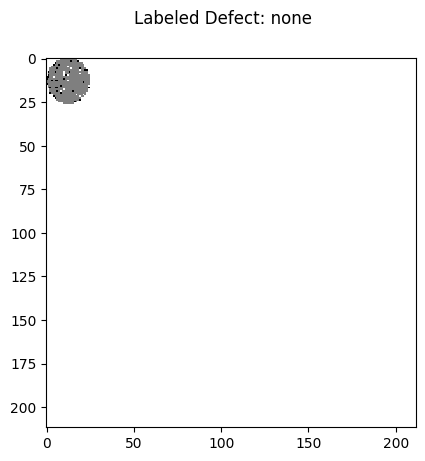

114000


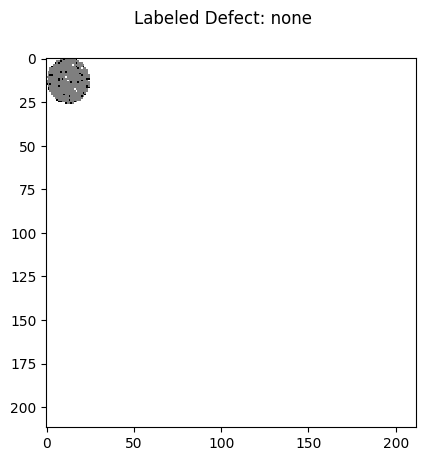

115000


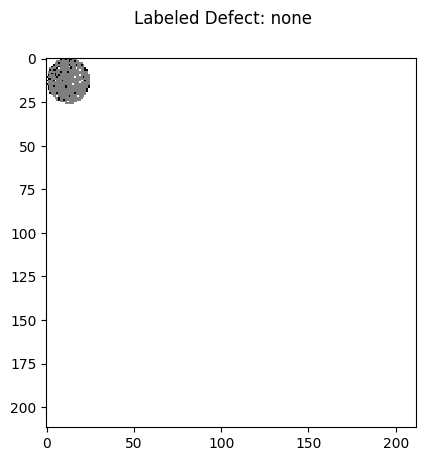

116000


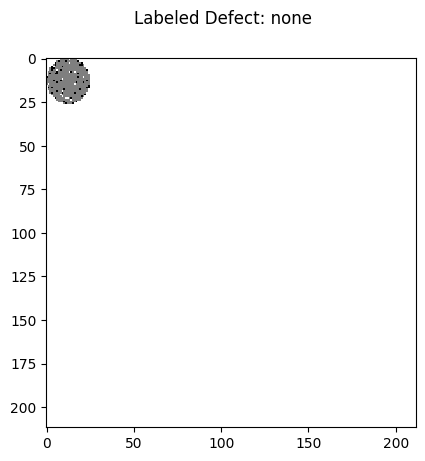

117000


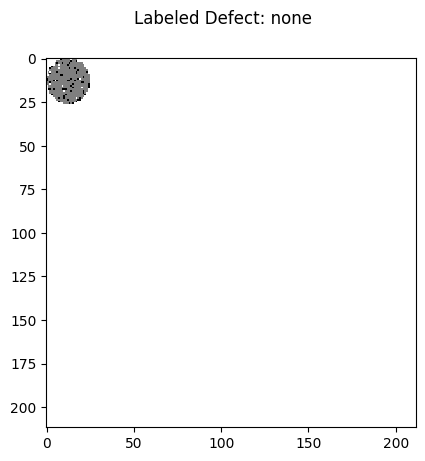

118000


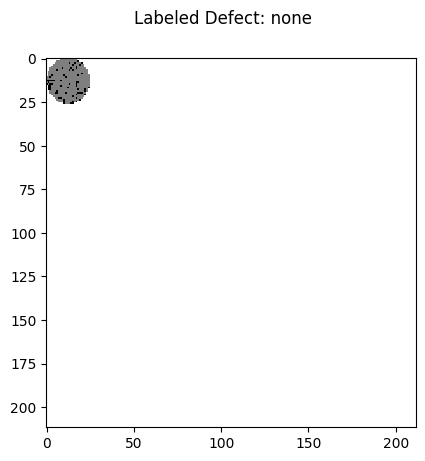

119000


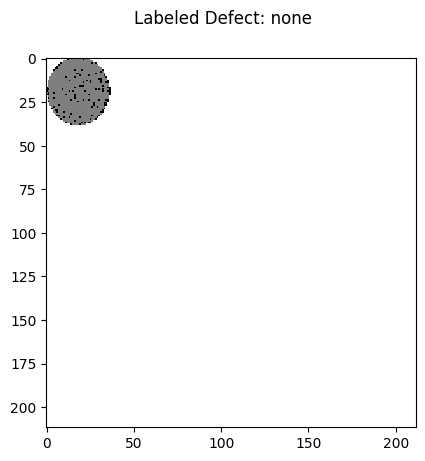

120000


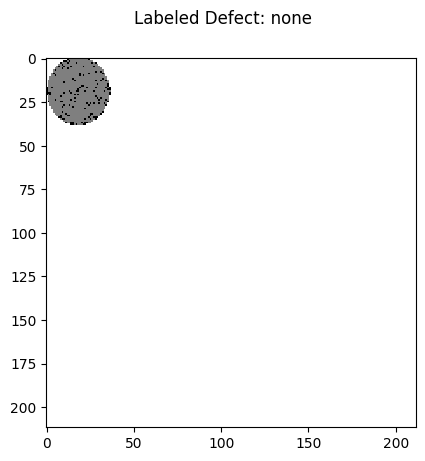

121000


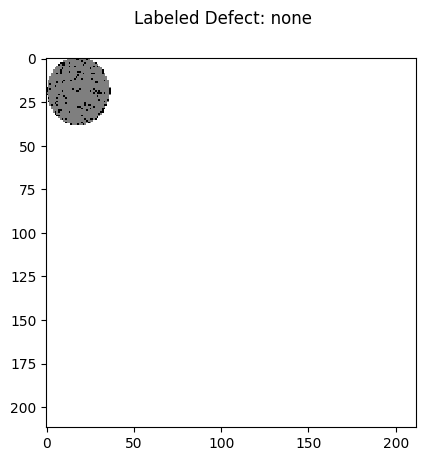

122000


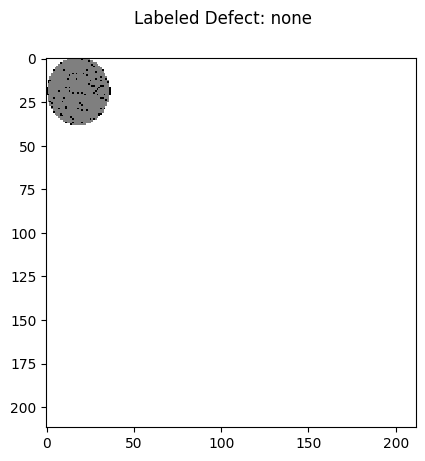

123000


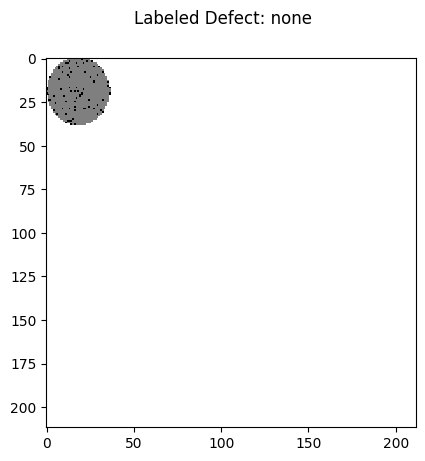

124000


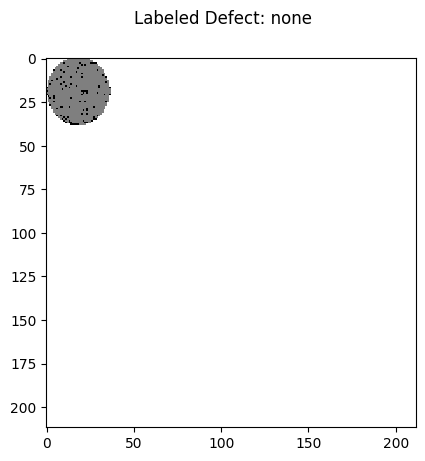

125000


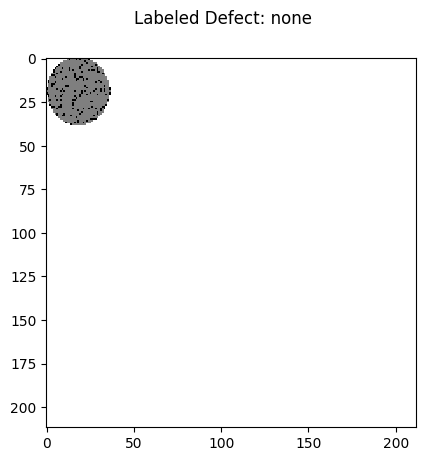

126000


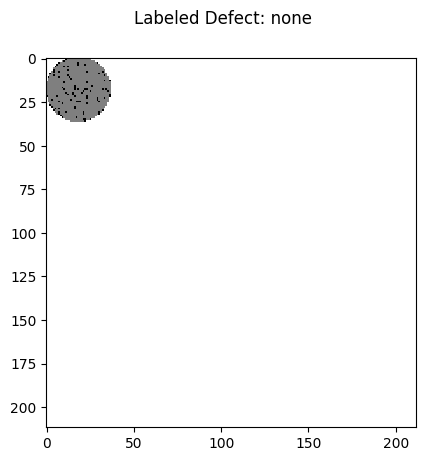

127000


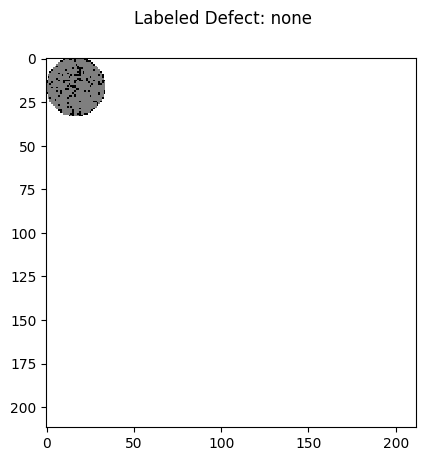

128000


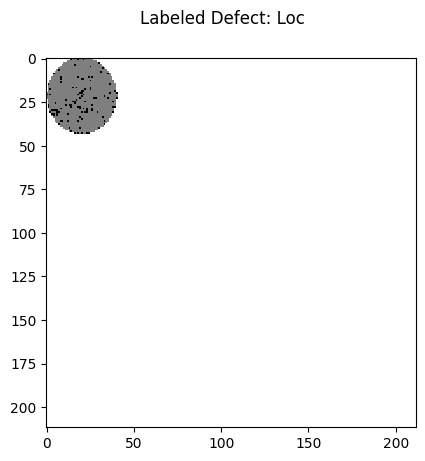

129000


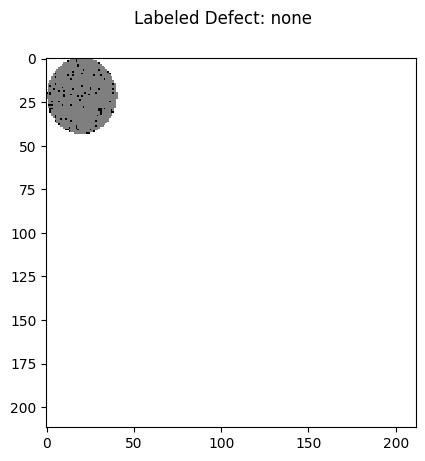

130000


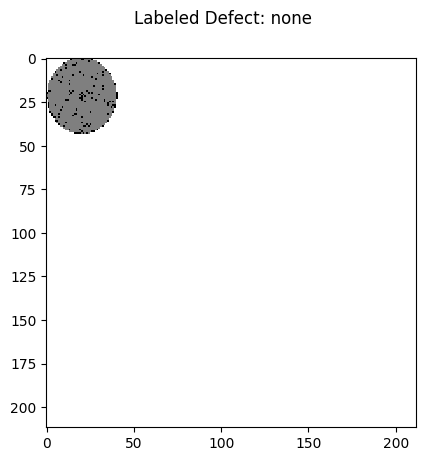

131000


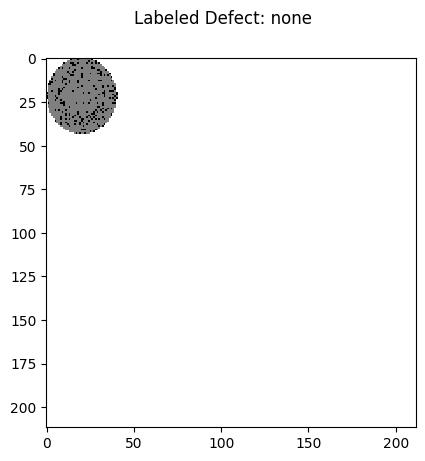

132000


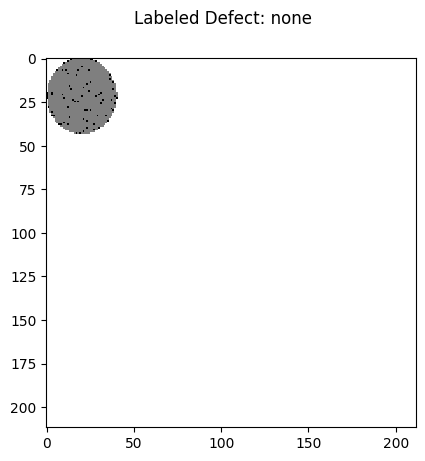

133000


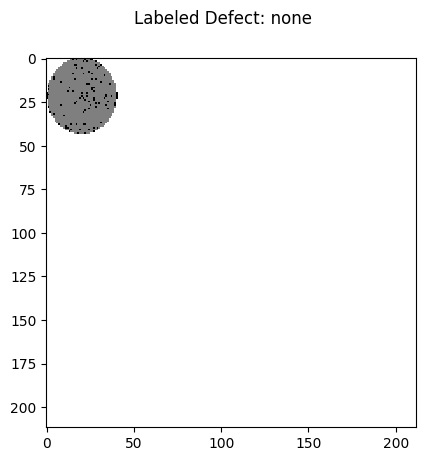

134000


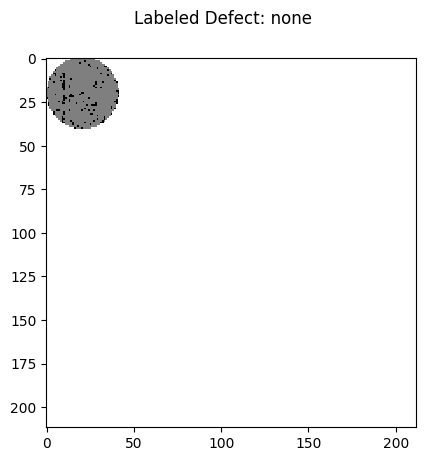

135000


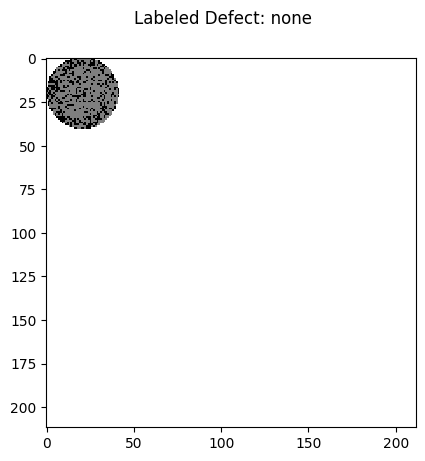

136000


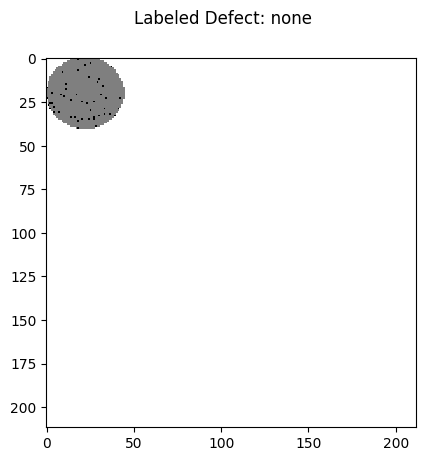

137000


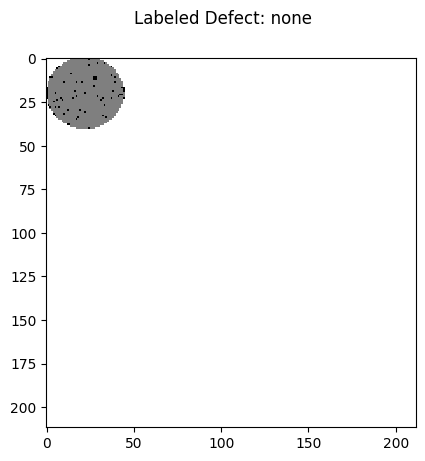

138000


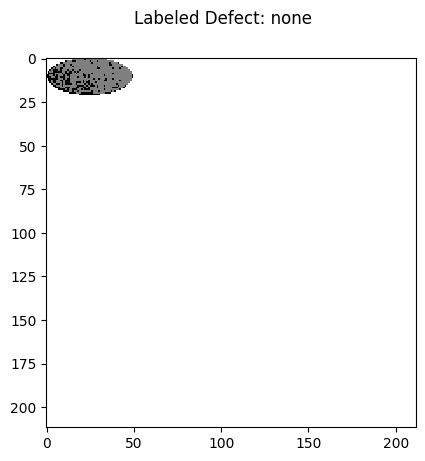

139000


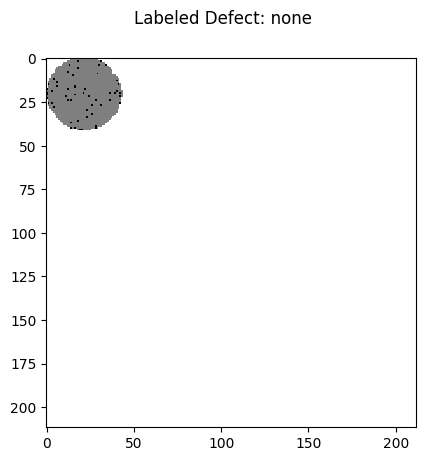

140000


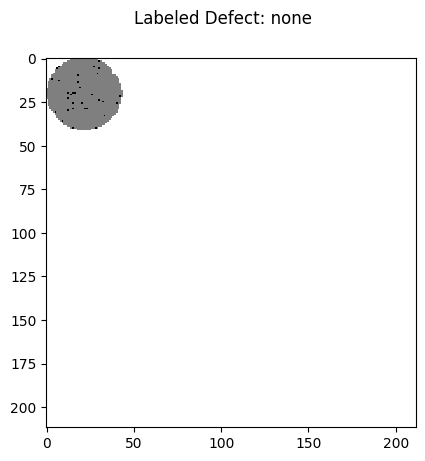

141000


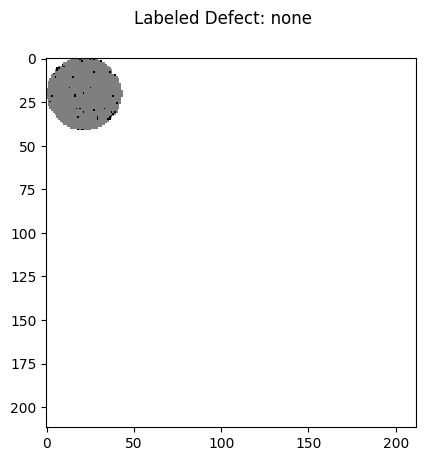

142000


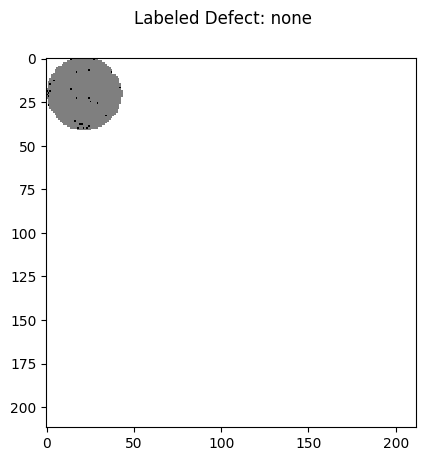

143000


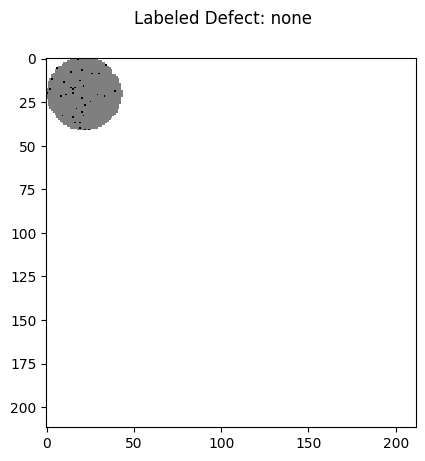

144000


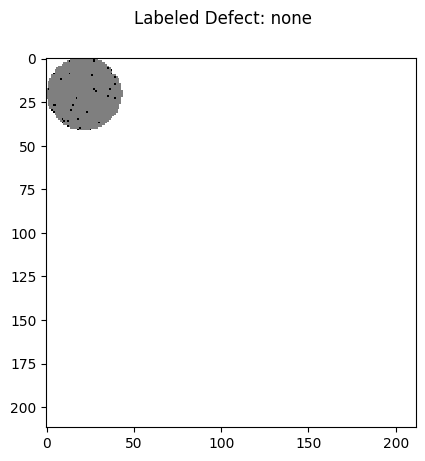

145000


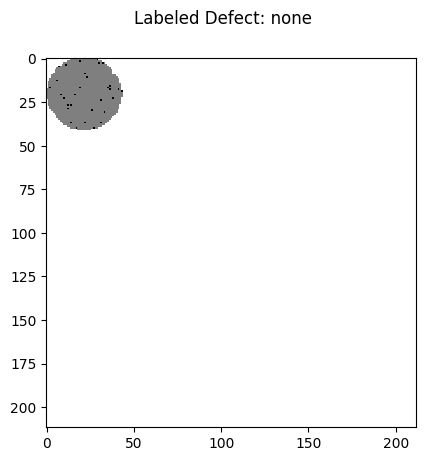

146000


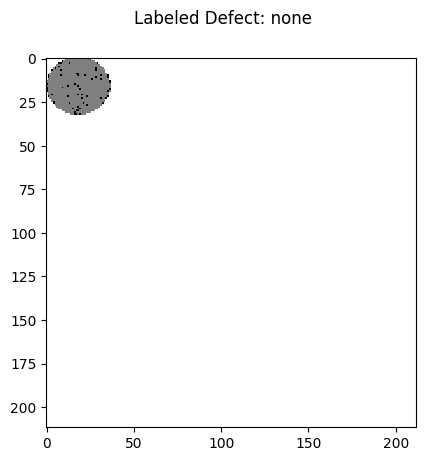

147000


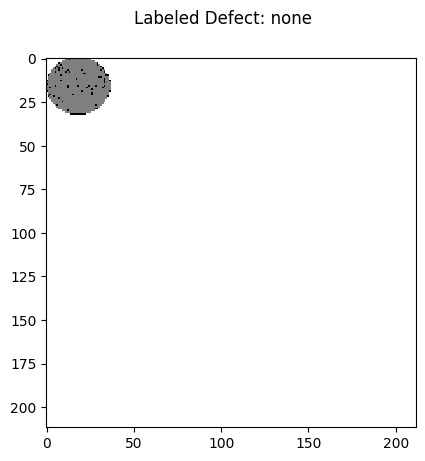

148000


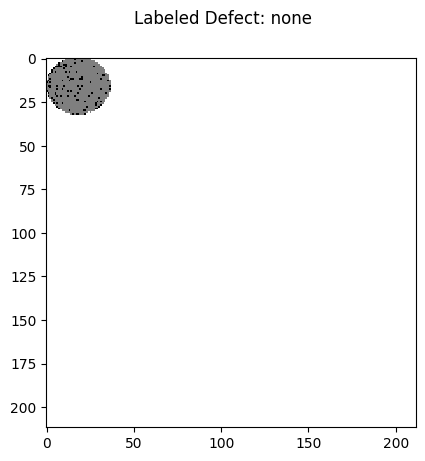

149000


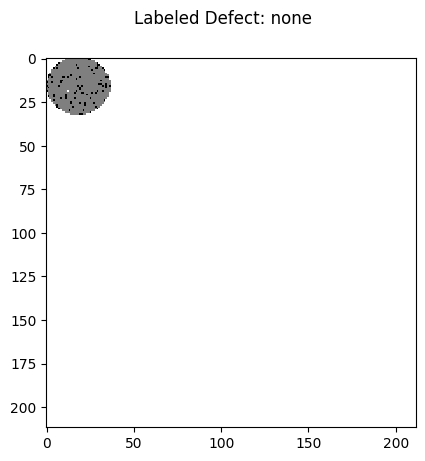

150000


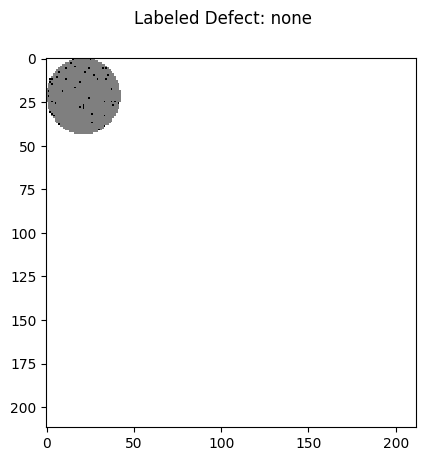

151000


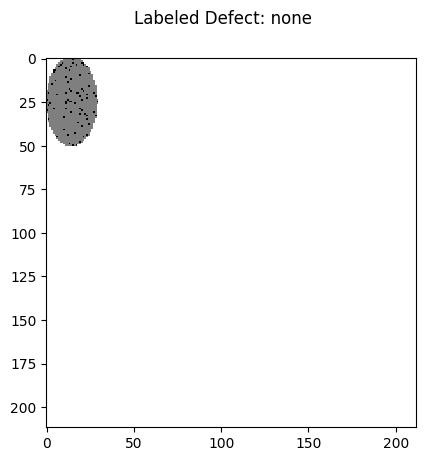

152000


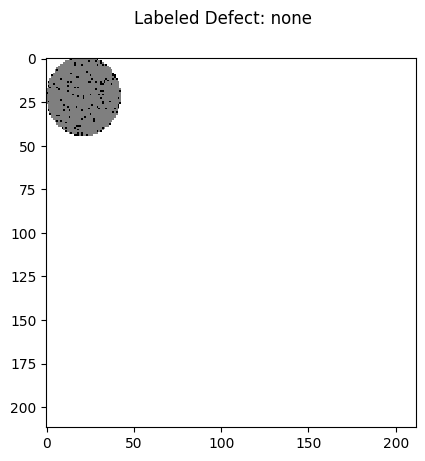

153000


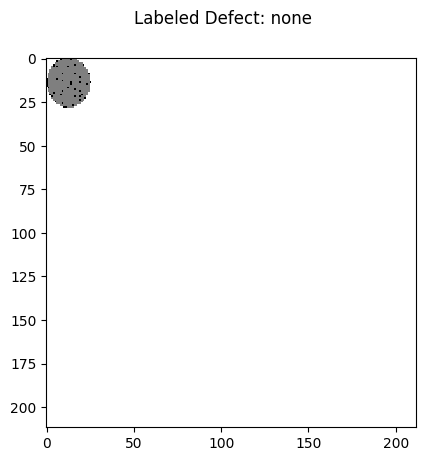

154000


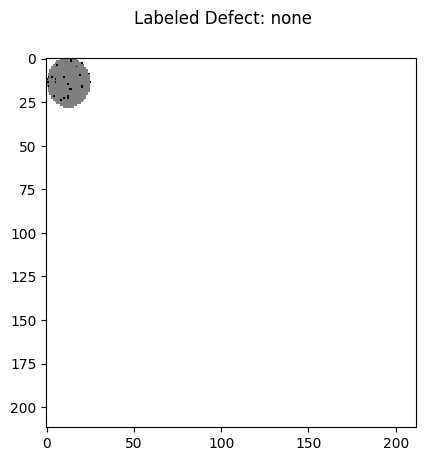

155000


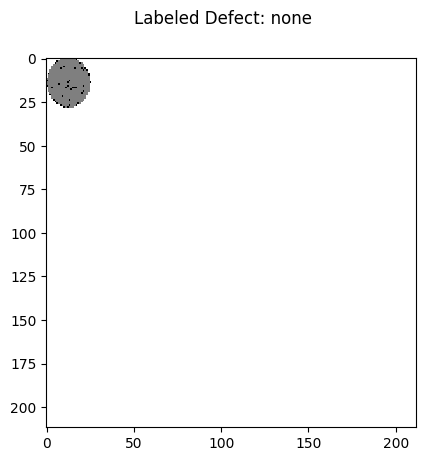

156000


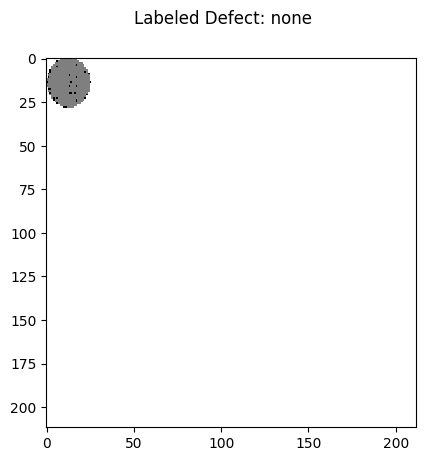

157000


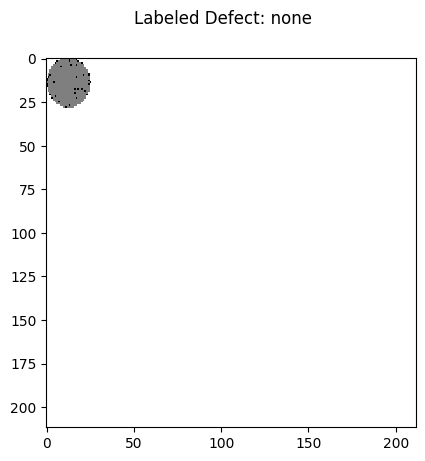

158000


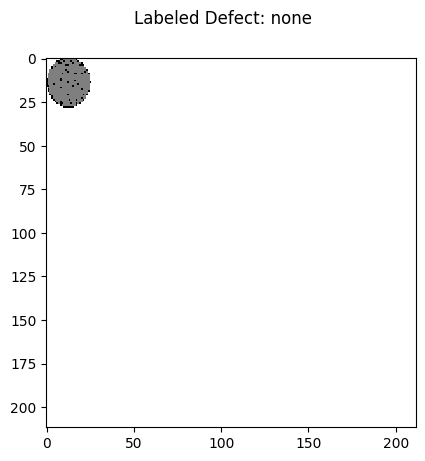

159000


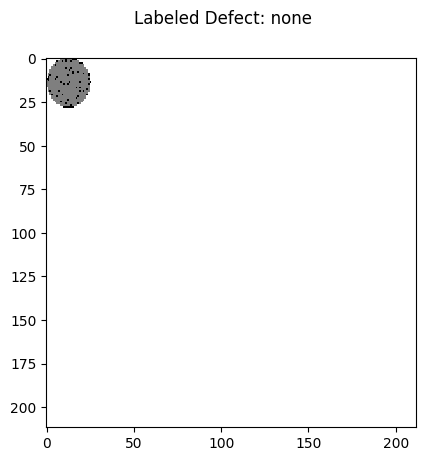

160000


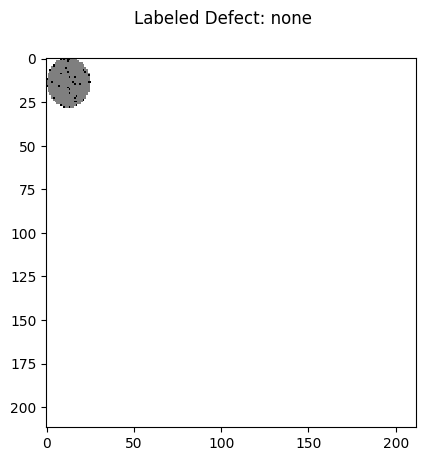

161000


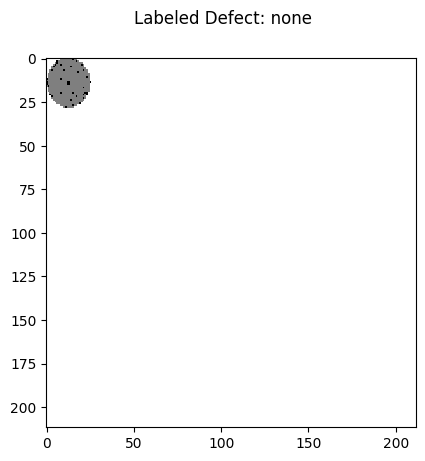

162000


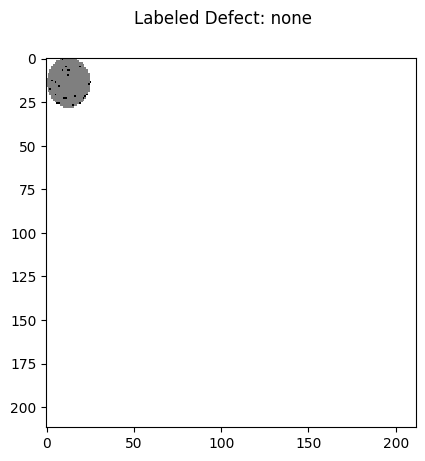

163000


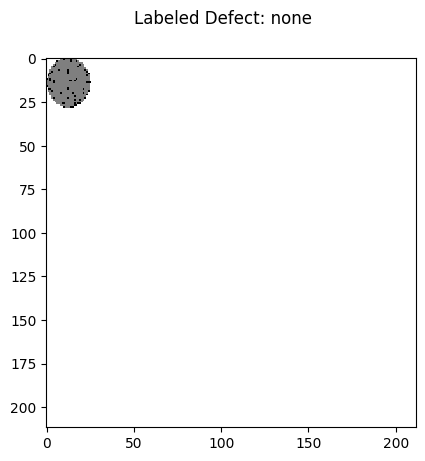

164000


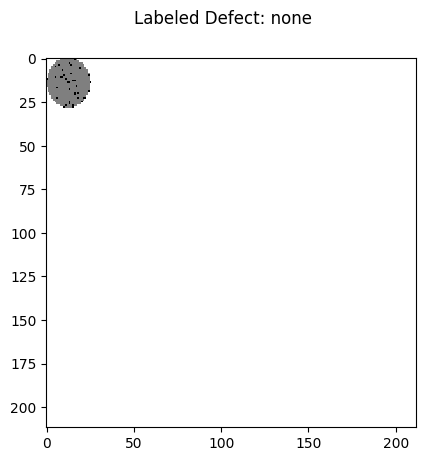

165000


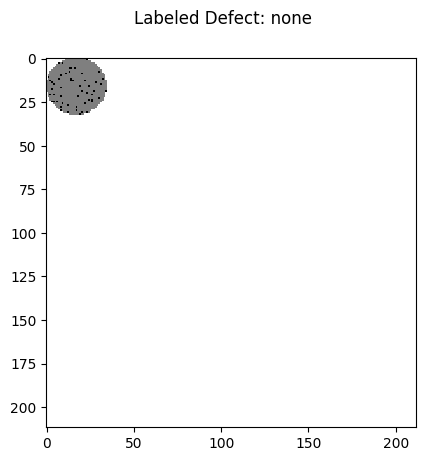

166000


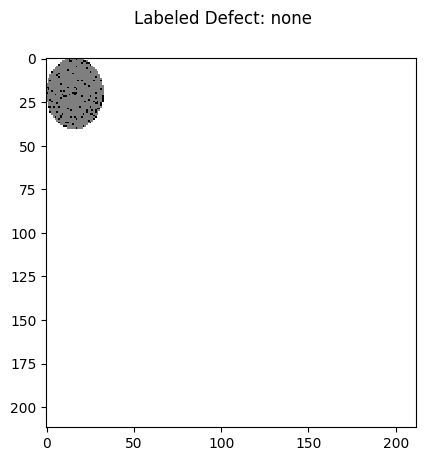

167000


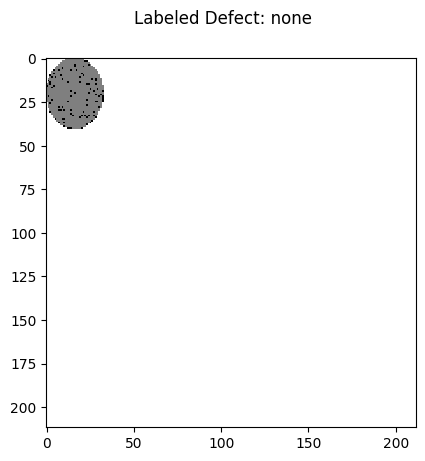

168000


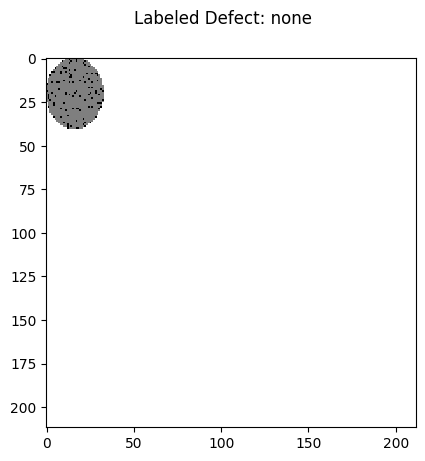

169000


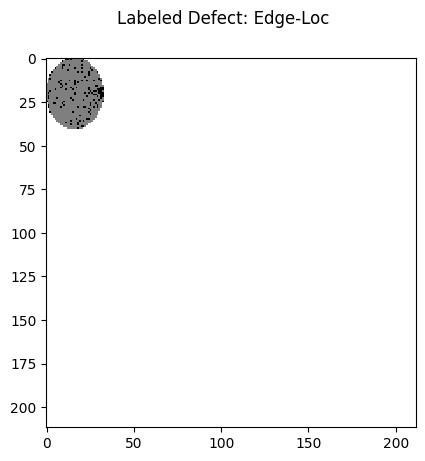

170000


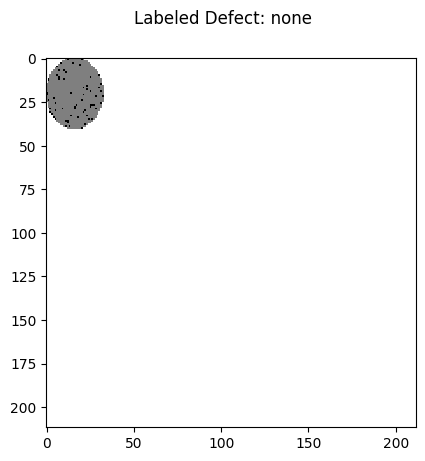

171000


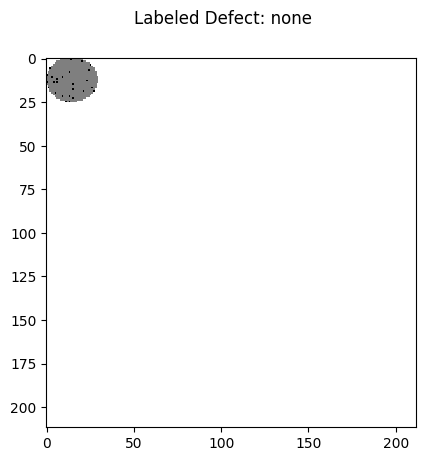

172000


In [11]:
# Resizing each element in "waferMap" to (100, 100)
#wafer_data.reset_index(inplace = True)
for idx, i in enumerate(wafer_data["waferMap"]):
  new_arr = np.zeros((212,212), dtype = (i.dtype))
  new_arr[:i.shape[0], :i.shape[1]] = i
  #wafer_data["waferMap"][idx] = np.resize(i, (100, 100))
  wafer_data.loc[idx, "waferMap"] = new_arr
  if (idx % 1000 == 0):
    printWaferMap(wafer_data.iloc[idx])
    print(idx)
shapes = set()
for i in wafer_data["waferMap"]:
  shapes.add(i.shape)
#print(shapes)
wafer_data.reset_index(drop = True, inplace = True)

In [12]:
for defect_type in defect_classes:
  if defect_type == 'none':
    break
  print(defect_type)
  augmentation = pd.DataFrame(oversampleData(wafer_data, defect_type))
  wafer_data = pd.concat([wafer_data.reset_index(drop=True), pd.DataFrame(augmentation).reset_index(drop=True)], ignore_index=True)

Center
Donut
Edge-Loc
Edge-Ring
Loc
Near-full
Random
Scratch


In [13]:
# Assess Data Augmentation
describeWaferData(wafer_data, defect_classes)

Center: 25764
Donut: 3330
Edge-Loc: 31134
Edge-Ring: 58080
Loc: 21558
Near-full: 894
Random: 5196
Scratch: 7158
none: 147431


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 4
batch_size = 32
learning_rate = 0.001

In [52]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.wafer_data = dataframe
        self.waferMap = dataframe["waferMap"]
        self.failureType = dataframe["failureType"]

    def __len__(self):
        return len(self.waferMap)

    def __getitem__(self, idx):
        waferMap = self.waferMap.iloc[idx]
        failureType = self.failureType.iloc[idx]
        failureType = np.array(failureType)
        waferMap = np.array(waferMap)

        failureType_mapping = {'Center': 0, 'Donut' : 1, 'Edge-Loc' : 2, 'Edge-Ring' : 3, 'Loc' : 4, 'Near-full' : 5, 'Random' : 6, 'Scratch' : 7, 'none' : 8}
        failureType = failureType_mapping[failureType[0][0]]

        return waferMap, failureType

In [54]:
# FLACKO

i, j = custom_wafer_data.__getitem__(0)
print(type(j))

<class 'int'>


In [81]:
print(len(wafer_data))
custom_wafer_data = CustomDataset(wafer_data)
print(custom_wafer_data.__len__())

300545
300545


In [82]:
train_size = int(0.8 * len(custom_wafer_data))
val_size = int(0.1 * len(custom_wafer_data))
test_size = len(custom_wafer_data) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(custom_wafer_data, [train_size, val_size, test_size])

# Create Loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [83]:
# Implement the convnet
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*50*50, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, len(defect_classes))
    pass

  def forward(self, x):
    x = x.unsqueeze(1)
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
    pass

In [84]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [85]:
training_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.float().to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 200 == 0:
      print(i)
      print(epoch)

print("Training Complete")

199
0
399
0
599
0
799
0
999
0
1199
0
1399
0
1599
0
1799
0
1999
0
2199
0
2399
0
2599
0
2799
0
2999
0
3199
0
3399
0
3599
0
3799
0
3999
0
4199
0
4399
0
4599
0
4799
0
4999
0
5199
0
5399
0
5599
0
5799
0
5999
0
6199
0
6399
0
6599
0
6799
0
6999
0
7199
0
7399
0
199
1
399
1
599
1


KeyboardInterrupt: 

In [86]:
for idx, (data,image) in enumerate(val_loader):
  print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [92]:
# Evaluate the model

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(len(defect_classes))]
  n_class_samples = [0 for i in range(len(defect_classes))]
  for images, labels in test_loader:
    images = images.float().to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    current_batch_size = labels.size(0)

    for i in range(current_batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

acc = 100.0 * n_correct / n_samples
print("The accuracy of the network is: " + str(acc))

for i in range(len(defect_classes)):
  acc = 100 * n_class_correct[i]/ n_class_samples[i]
  print(defect_classes[i] + " " + str(acc))

The accuracy of the network is: 70.89336216935618
Center 51.20663650075415
Donut 1.1869436201780414
Edge-Loc 11.0699969164354
Edge-Ring 77.42382271468144
Loc 22.334780511336227
Near-full 0.0
Random 13.559322033898304
Scratch 0.0
none 99.81514446118034


In [4]:
def oversampleData(wafers, defect_type):
  temp_df = wafers.copy()
  temp_df.drop(temp_df.index, inplace = True)
  for index, rows in wafers.loc[wafers['failureType'] == defect_type].iterrows():
    temp_wafer_ud = rows
    temp_wafer_ud['waferMap'] = np.flip(temp_wafer_ud['waferMap'], 0)
    temp_df.loc[len(temp_df)] = temp_wafer_ud

    temp_wafer_lr = rows
    temp_wafer_lr['waferMap'] = np.flip(temp_wafer_lr['waferMap'], 0)
    temp_df.loc[len(temp_df)] = temp_wafer_lr

    temp_wafer_90 = rows
    temp_wafer_90['waferMap'] = np.rot90(temp_wafer_90['waferMap'], 1)
    temp_df.loc[len(temp_df)] = temp_wafer_90

    temp_wafer_180 = rows
    temp_wafer_180['waferMap'] = np.rot90(temp_wafer_180['waferMap'], 1)
    temp_df.loc[len(temp_df)] = temp_wafer_180

    temp_wafer_270 = rows
    temp_wafer_270['waferMap'] = np.rot90(temp_wafer_270['waferMap'], 1)
    temp_df.loc[len(temp_df)] = temp_wafer_270

  return temp_df
  pass

In [5]:
def describeWaferData(wafer_data, classes):
  for classType in classes:
    count = (wafer_data['failureType'] == classType).sum()
    print(classType + ": " + str(count))

In [6]:
def printWaferMap(wafer, prediction = ""):
  # Generate a plot using the binary colormap
  # Wafer area is indicated by grey, defects are indicated in black
  wafer_map = wafer['waferMap']
  plt.imshow(wafer_map, cmap='binary', interpolation='nearest')

  plt.suptitle("Labeled Defect: " + str(wafer['failureType'][0][0]))

  plt.show()
  pass